In [1]:
import os
import pandas as pd
import plotly.express as px
import numpy as np
import itertools
from IPython.display import Image


# Point to files needed and set global paramaters

In [6]:
TFEAcutoffVal=0.00000000001
#pvalcolumn="P-adj"
#escorecolumn="E-Score"
pvalcolumn="Corrected P-adj"
escorecolumn="Corrected E-Score"

#this value is what makes the size of the metaplot at the bottom change. 
pvalshrinkageval = 1/2 
#My imporant pvalues where near 1.000000e-12 and my non-impoant ones near 1.000000e-1 so she needed pvalshrinkageval = 1/6
#Nina's imporant ones where near 1.000000e-48 and non-important 1.000000e-3 so she needed pvalshrinkageval = 1/2



In [7]:
#indir
#this should be a directory that contains all the directories that are your TFEA output
#for instance in my case 
#/Shares/down/heatshock/analysis_June2022/outfiles/ATAC/TFEA_output/HOCOMOCO10/ contains two subdirectoryes that are both TFEA output

indir = "/scratch/Shares/dowell/temp/forMary/Ninas_TFEA_outputs/all/"

#out files
outdir="/scratch/Users/allenma/nina/mumerge_deseq_tfea/TFEA/"
#only used if you set ofn 
#ofn is output filename

#mark these TFs on the plot
#when you first start marktheseTFs is empty. If there is a TF you want to mark on the MA plots or the scatter plots this will mark it
#marktheseTFs ={}
marktheseTFs = {"EGR1_HUMAN.H10MO.A":"EGR1","GATA1_HUMAN.H10MO.A":"GATA1" }
#marktheseTFs ={"HSF1_HUMAN.H10MO.A":"HSF1", "HXB2_HUMAN.H10MO.D":"HXB2", "HSF2_HUMAN.H10MO.A":"HSF2", "HSF4_HUMAN.H10MO.D":"HSF4"}


# seting up the python dictionarys that will have all the comparisons in them


In [8]:
filenamesdict = {}
colordic = {}
colorlist = ["blue", "green", "magenta", "purple", "light blue"]
allfilesdir = [filename for filename in os.listdir(indir) if os.path.isdir(filename)]
allfilesdir = [dirname for dirname in allfilesdir if not dirname.startswith(".")]
for i, filename in enumerate(allfilesdir):
    print (filename)
    filenamesdict[filename]=indir+filename+"/results.txt"
    colordic[filename]=colorlist[i]
filenamesdict

results_WTvsKO
results_KOvsKOAS
results_WTvsWTAS
results_WTASvsKOAS


{'results_KOvsKOAS': '/scratch/Shares/dowell/temp/forMary/Ninas_TFEA_outputs/all/results_KOvsKOAS/results.txt',
 'results_WTASvsKOAS': '/scratch/Shares/dowell/temp/forMary/Ninas_TFEA_outputs/all/results_WTASvsKOAS/results.txt',
 'results_WTvsKO': '/scratch/Shares/dowell/temp/forMary/Ninas_TFEA_outputs/all/results_WTvsKO/results.txt',
 'results_WTvsWTAS': '/scratch/Shares/dowell/temp/forMary/Ninas_TFEA_outputs/all/results_WTvsWTAS/results.txt'}

In [9]:
colordic

{'results_KOvsKOAS': 'green',
 'results_WTASvsKOAS': 'purple',
 'results_WTvsKO': 'blue',
 'results_WTvsWTAS': 'magenta'}

# Read in TFEA results

In [10]:
def readresultstable(filename):
    df = pd.read_csv(filename, sep="\t", index_col=False)
    return df
 
def abovecuttoff(row, sample):
    pval= row[pvalcolumn]
    if pval<=TFEAcutoffVal:
        col="Sig"
    else:
        col="N.S."
    return col

# Plot MA

In [11]:

def MAplotresults_labeledpoints(filename,outfilename="none", labelcolor="red"):
    samplename=filename.split("/")[-2]
    print (samplename)
    df = readresultstable(filename)
    df["cutoff"]= df.apply(lambda row : abovecuttoff(row, samplename), axis = 1)
    fig = px.scatter(df, y=df[escorecolumn], x=np.log10(df['Events']), hover_data=['#TF', 'P-adj', 'Corrected P-adj'], color=df["cutoff"],color_discrete_sequence=[labelcolor, "#D3D3D3"])
    fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)',})
    minidf = df[df["#TF"].isin(marktheseTFs.keys())]
    print(df.head())
    minidf = minidf[minidf["Corrected P-adj"]<=TFEAcutoffVal]
    for i, idxval in enumerate(minidf.index):
        print (df.loc[idxval,"#TF"])
        fig.add_annotation(x=np.log10(df.loc[idxval,"Events"]), y=df.loc[idxval,escorecolumn], text=marktheseTFs[df.loc[idxval,"#TF"]],showarrow=False, font=dict(
        family="sans serif",
        size=30,
        color=labelcolor
    ))
    fig.update_layout(xaxis_title="mean signal for this TF",yaxis_title="TF Enrichment Score",
    font=dict(
        family="sans serif",
        size=30))
    fig.update_layout(showlegend=False)
    if outfilename!="none":
        fig.write_image(outfilename,engine='kaleido')
    fig.show()
    return df


In [15]:

def plotallMA():
    for dirname in filenamesdict.keys():
        filename = filenamesdict[dirname]
        labelcolor = colordic[dirname]
        ofn = filename+".svg"
        print (ofn)
        outdf = MAplotresults_labeledpoints(filename, labelcolor=labelcolor)
    return outdf





In [16]:
outdf = plotallMA()

/scratch/Shares/dowell/temp/forMary/Ninas_TFEA_outputs/all/results_WTvsKO/results.txt.svg
results_WTvsKO
                   #TF   E-Score  Corrected E-Score  Events        GC  FPKM  \
0  GATA1_HUMAN.H10MO.A  0.222527           0.216011    1354  0.470436   NaN   
1  FOXC2_HUMAN.H10MO.D  0.178800           0.166759    1397  0.366667   NaN   
2   EGR1_HUMAN.H10MO.A -0.046835          -0.042248   15158  0.678945   NaN   
3    WT1_HUMAN.H10MO.D -0.057496          -0.045742    9588  0.813568   NaN   
4   NFE2_HUMAN.H10MO.B  0.130269           0.126008    1283  0.512772   NaN   

          P-adj  Corrected P-adj cutoff  
0  1.000000e-13     1.000000e-12    Sig  
1  1.000000e-08     1.000000e-07   N.S.  
2  1.000000e-07     1.000000e-05   N.S.  
3  1.000000e-06     1.000000e-04   N.S.  
4  1.000000e-04     1.000000e-03   N.S.  
GATA1_HUMAN.H10MO.A


/Users/allenma/jhub_venv/lib64/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



/scratch/Shares/dowell/temp/forMary/Ninas_TFEA_outputs/all/results_KOvsKOAS/results.txt.svg

/Users/allenma/jhub_venv/lib64/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10




results_KOvsKOAS
                   #TF   E-Score  Corrected E-Score  Events        GC  FPKM  \
0  GATA1_HUMAN.H10MO.A  0.403722           0.403925    1354  0.470436   NaN   
1  FOXC2_HUMAN.H10MO.D  0.357100           0.347238    1397  0.366667   NaN   
2    THA_HUMAN.H10MO.C  0.058960           0.065306   15172  0.533762   NaN   
3   HSF1_HUMAN.H10MO.A  0.198021           0.194730    1613  0.434419   NaN   
4   HSF4_HUMAN.H10MO.D  0.222420           0.214375    1221  0.385403   NaN   

          P-adj  Corrected P-adj cutoff  
0  1.000000e-48     1.000000e-48    Sig  
1  1.000000e-35     1.000000e-33    Sig  
2  1.000000e-12     1.000000e-15    Sig  
3  1.000000e-13     1.000000e-12    Sig  
4  1.000000e-12     1.000000e-11   N.S.  
GATA1_HUMAN.H10MO.A


/scratch/Shares/dowell/temp/forMary/Ninas_TFEA_outputs/all/results_WTvsWTAS/results.txt.svg
results_WTvsWTAS


/Users/allenma/jhub_venv/lib64/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



                   #TF   E-Score  Corrected E-Score  Events        GC  FPKM  \
0  GATA1_HUMAN.H10MO.A  0.360201           0.349731    1354  0.470436   NaN   
1  FOXC2_HUMAN.H10MO.D  0.300021           0.307622    1397  0.366667   NaN   
2  CPEB1_HUMAN.H10MO.D  0.025884           0.071888   19716  0.146162   NaN   
3   NFYA_HUMAN.H10MO.A  0.239668           0.221048    1458  0.517230   NaN   
4   NFYB_HUMAN.H10MO.A  0.208603           0.189156    1444  0.521973   NaN   

          P-adj  Corrected P-adj cutoff  
0  1.000000e-37     1.000000e-34    Sig  
1  1.000000e-26     1.000000e-28    Sig  
2  1.000000e-02     1.000000e-26    Sig  
3  1.000000e-17     1.000000e-14    Sig  
4  1.000000e-14     1.000000e-11   N.S.  
GATA1_HUMAN.H10MO.A


/scratch/Shares/dowell/temp/forMary/Ninas_TFEA_outputs/all/results_WTASvsKOAS/results.txt.svg
results_WTASvsKOAS
                   #TF   E-Score  Corrected E-Score  Events        GC  FPKM  \
0  TFDP1_HUMAN.H10MO.D -0.273377          -0.130635   19613  0.752167   NaN   
1    THA_HUMAN.H10MO.C  0.098784           0.138890   15172  0.533762   NaN   
2   PAX5_HUMAN.H10MO.A  0.082565           0.157761    9458  0.608431   NaN   
3    SP2_HUMAN.H10MO.C -0.251470          -0.089175   22335  0.793775   NaN   
4    SP3_HUMAN.H10MO.B -0.238456          -0.092748   21395  0.758479   NaN   

          P-adj  Corrected P-adj cutoff  
0  0.000000e+00     1.000000e-94    Sig  
1  1.000000e-39     1.000000e-78    Sig  
2  1.000000e-14     1.000000e-54    Sig  
3  0.000000e+00     1.000000e-51    Sig  
4  0.000000e+00     1.000000e-50    Sig  
EGR1_HUMAN.H10MO.A
GATA1_HUMAN.H10MO.A


/Users/allenma/jhub_venv/lib64/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



# What is my favorite tf's name so I can put it in marktheseTFs

In [18]:
tfs = outdf["#TF"].to_list()

In [19]:
print([tf for tf in tfs if tf.startswith("HSF")])

['HSF1_HUMAN.H10MO.A', 'HSF2_HUMAN.H10MO.A', 'HSF4_HUMAN.H10MO.D', 'HSFY1_HUMAN.H10MO.D']


In [20]:
print([tf for tf in tfs if tf.startswith("GATA")])

['GATA1_HUMAN.H10MO.A', 'GATA5_HUMAN.H10MO.D', 'GATA1_HUMAN.H10MO.S', 'GATA2_HUMAN.H10MO.A', 'GATA6_HUMAN.H10MO.B', 'GATA4_HUMAN.H10MO.B', 'GATA6_HUMAN.H10MO.S', 'GATA3_HUMAN.H10MO.C']


# Plot scatter 

In [21]:
def checkcat(row, sample1, sample2):
    pval1= row[pvalcolumn+"_"+sample1]
    pval2= row[pvalcolumn+"_"+sample2]
    if pval1<=TFEAcutoffVal and pval2<=TFEAcutoffVal:
        cat = "adj-pval<="+str(TFEAcutoffVal)+", both comparisons"
    elif pval1<=TFEAcutoffVal:
        cat = "adj-pval<="+str(TFEAcutoffVal)+", "+sample1
    elif pval2<=TFEAcutoffVal:
        cat = "adj-pval<="+str(TFEAcutoffVal)+", "+sample2
    else:
        cat="N.S."
    return cat


def mergedfs(filename1, filename2, label1, label2):
    df1 = readresultstable(filename1)
    df2 = readresultstable(filename2)
    df = df1.merge(df2, left_on='#TF', right_on='#TF',suffixes=('_'+label1, '_'+label2))
    df["category"] =  df.apply(lambda row : checkcat(row, label1, label2), axis = 1)
    return df, label1, label2

def merge_multi_dfs(samplesdict):
    dfs = []
    for i, sample in enumerate(sorted(samplesdict.keys())):
        df = readresultstable(samplesdict[sample])
        samplename = sample
        df.columns = [samplename+"__"+col if col!="#TF" else col for col in df.columns]
        if i==0:
            masterdf = df
        else:
            masterdf = masterdf.merge(df, left_on='#TF', right_on='#TF')
    return masterdf




def scattertwo(filename1, filename2, label1, label2, columname=escorecolumn,outfilename="none"):
    df, sample1, sample2 = mergedfs(filename1, filename2, label1, label2)
    xdata = columname+"_"+sample1
    ydata = columname+"_"+sample2
    df = df.sort_values(by="category")
    colordict = {"adj-pval<="+str(TFEAcutoffVal)+", both comparisons":"rgb(255,0,0)", "adj-pval<="+str(TFEAcutoffVal)+", "+label1:colordic[label1], "adj-pval<="+str(TFEAcutoffVal)+", "+label2:colordic[label2], "N.S.":"#D3D3D3"}
    fig = px.scatter(df, x=df[xdata], y=df[ydata], color="category", hover_data=['#TF'], color_discrete_map=colordict)
    fig.update_layout(shapes = [{'type': 'line', 'y0': -0.4, 'y1': 0.4, 'x0': -0.4, 'x1': 0.4,"line":{"color":"rgb(200, 200, 200)"}}])
    fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)',})
    fig.update_layout(showlegend=False)
    minidf = df[df["#TF"].isin(marktheseTFs.keys())]
    fig.update_layout(xaxis_title=label1+" induced changes",yaxis_title=label2+"induced changes",
    font=dict(
        family="sans serif",
        size=30))
    minidf = df[df["#TF"].isin(marktheseTFs.keys())]
    for i, idxval in enumerate(minidf.index):
        colorlookup = df.loc[idxval,"category"]
        colorlookup = colordict[colorlookup]
        print (df.loc[idxval,"#TF"])
        fig.add_annotation(x=df.loc[idxval,xdata], y=df.loc[idxval,ydata], text=marktheseTFs[df.loc[idxval,"#TF"]],showarrow=False,font=dict(
         family="sans serif",
         size=30,
         color=colorlookup))
    if outfilename!="none":
        fig.write_image(outfilename,engine='kaleido')
    fig.show()
    return df



In [22]:
TFEAsamples = list(filenamesdict.keys())
TFEAsets = list(itertools.permutations(TFEAsamples, 2))
TFEAsets

[('results_WTvsKO', 'results_KOvsKOAS'),
 ('results_WTvsKO', 'results_WTvsWTAS'),
 ('results_WTvsKO', 'results_WTASvsKOAS'),
 ('results_KOvsKOAS', 'results_WTvsKO'),
 ('results_KOvsKOAS', 'results_WTvsWTAS'),
 ('results_KOvsKOAS', 'results_WTASvsKOAS'),
 ('results_WTvsWTAS', 'results_WTvsKO'),
 ('results_WTvsWTAS', 'results_KOvsKOAS'),
 ('results_WTvsWTAS', 'results_WTASvsKOAS'),
 ('results_WTASvsKOAS', 'results_WTvsKO'),
 ('results_WTASvsKOAS', 'results_KOvsKOAS'),
 ('results_WTASvsKOAS', 'results_WTvsWTAS')]

In [23]:
def plotallscatters():
    for TFEAset in TFEAsets:
        sample1name, sample2name = TFEAset
        print (sample1name, sample2name)
        filename1 = filenamesdict[sample1name]
        filename2 = filenamesdict[sample2name]
        ofn = "none"
        tf = scattertwo(filename1, filename2, sample1name, sample2name, outfilename=ofn)


In [24]:
plotallscatters()

results_WTvsKO results_KOvsKOAS
EGR1_HUMAN.H10MO.A
GATA1_HUMAN.H10MO.A


results_WTvsKO results_WTvsWTAS
EGR1_HUMAN.H10MO.A
GATA1_HUMAN.H10MO.A


results_WTvsKO results_WTASvsKOAS
GATA1_HUMAN.H10MO.A
EGR1_HUMAN.H10MO.A


results_KOvsKOAS results_WTvsKO
EGR1_HUMAN.H10MO.A
GATA1_HUMAN.H10MO.A


results_KOvsKOAS results_WTvsWTAS
EGR1_HUMAN.H10MO.A
GATA1_HUMAN.H10MO.A


results_KOvsKOAS results_WTASvsKOAS
GATA1_HUMAN.H10MO.A
EGR1_HUMAN.H10MO.A


results_WTvsWTAS results_WTvsKO
EGR1_HUMAN.H10MO.A
GATA1_HUMAN.H10MO.A


results_WTvsWTAS results_KOvsKOAS
EGR1_HUMAN.H10MO.A
GATA1_HUMAN.H10MO.A


results_WTvsWTAS results_WTASvsKOAS
GATA1_HUMAN.H10MO.A
EGR1_HUMAN.H10MO.A


results_WTASvsKOAS results_WTvsKO
GATA1_HUMAN.H10MO.A
EGR1_HUMAN.H10MO.A


results_WTASvsKOAS results_KOvsKOAS
GATA1_HUMAN.H10MO.A
EGR1_HUMAN.H10MO.A


results_WTASvsKOAS results_WTvsWTAS
GATA1_HUMAN.H10MO.A
EGR1_HUMAN.H10MO.A


# Plot pvalues and escores all 4 comparisons

In [25]:


def createadf_multisample_onecol(column=pvalcolumn, sampledict=filenamesdict):
    a = merge_multi_dfs(sampledict)
    a.index = a["#TF"]
    colsneeded = [col for col in a.columns if col.endswith("_"+column)]    
    return a[colsneeded]

def getpvalslong(sampledict, id_vars):
    pvaldf= createadf_multisample_onecol(column=pvalcolumn, sampledict=sampledict)
    pvaldf = pvaldf[pvaldf.min(axis=1)<=TFEAcutoffVal] #filter only TF's above the cuttof
    no_zero = pvaldf.min(axis=1)!=0
    m = pvaldf[no_zero].min().min()
    pvaldf = pvaldf.replace(to_replace=0,value=m)
    value_vars = pvaldf.columns.tolist()
    pvaldf["#TF"] = pvaldf.index 
    pvaldflong = pd.melt(pvaldf, id_vars=id_vars, value_vars=value_vars)
    pvaldflong["sample"]=pvaldflong["variable"].str.split("__")
    pvaldflong["value_type"]=pvalcolumn
    pvaldflong[["sample", "value_type"]] = pvaldflong["variable"].str.split("__", expand=True)
    pvaldflong = pvaldflong[["#TF", "sample", "value"]]
    pvaldflong.columns = ["#TF", "sample", pvalcolumn]
    return pvaldflong

def getescorelong(sampledict, id_vars):
    escoredf = createadf_multisample_onecol(column=escorecolumn, sampledict=sampledict)
    escoredf = escoredf.reindex(escoredf.index.tolist())
    value_vars = escoredf.columns.tolist()
    escoredf["#TF"] = escoredf.index
    escoredflong = pd.melt(escoredf, id_vars=id_vars, value_vars=value_vars)
    escoredflong[["sample", "value_type"]] = escoredflong["variable"].str.split("__", expand=True)
    escoredflong["value_type"]=escorecolumn
    escoredflong = escoredflong[["#TF", "sample", "value"]]
    escoredflong.columns = ["#TF", "sample", escorecolumn]
    return escoredflong

def createmergedataframeforplotpvals():
    sampledict=filenamesdict
    id_vars = ["#TF"]
    # collect p-values all samples
    pvaldflong = getpvalslong(sampledict,id_vars=id_vars)
    #OK, now I have a pvaldflong dataframe
    escoredflong = getescorelong(sampledict, id_vars)
    pvalescoremerge = pvaldflong.merge(escoredflong, left_on=["#TF", "sample"], right_on=["#TF", "sample"])
    pvalescoremerge["sig"] =  pvalescoremerge.apply(lambda row : checksig(row), axis = 1)
    return pvalescoremerge
    


def groupmultiple(pvalescoremerge):
    grouped_multiple = pvalescoremerge.groupby(['#TF']).agg({pvalcolumn: ['mean', 'min', 'max',], "sig":['sum'], escorecolumn: ['mean', 'min', 'max', "sum"]})
    grouped_multiple.columns = [pvalcolumn+'_mean', pvalcolumn+'_min', pvalcolumn+'_max', "sig_count", escorecolumn+"_mean", escorecolumn+"_min", escorecolumn+"_max", escorecolumn+"_sum"]
    grouped_multiple = grouped_multiple.reset_index()
    grouped_multiple = grouped_multiple.sort_values(["sig_count", escorecolumn+'_sum'], ascending=[True, False])
    sorter = grouped_multiple["#TF"].tolist()
    sorterIndex = dict(zip(sorter, range(len(sorter))))
    pvalescoremerge['TF_Rank'] = pvalescoremerge['#TF'].map(sorterIndex)
    pvalescoremerge = pvalescoremerge.sort_values(["TF_Rank"], ascending=[False])
    return pvalescoremerge


def checksig(row):
    sig = row[pvalcolumn]<=TFEAcutoffVal
    return sig



def TFEAcompareall(outfilename="none"):
    pvalescoremerge = createmergedataframeforplotpvals()
    pvalescoremerge = groupmultiple(pvalescoremerge)
    pvalescoremerge[["justTF", "org"]]=pvalescoremerge["#TF"].str.split("_", n=1, expand=True)
    pvalescoremerge[pvalcolumn+"_transform"] = pvalescoremerge.apply(lambda row : sizetrans(row), axis = 1)
    fig = px.scatter(pvalescoremerge, x="sample", y="justTF",color=escorecolumn,size=pvalcolumn+"_transform",color_continuous_scale=px.colors.diverging.balance,
                                 color_continuous_midpoint=0, symbol="sig",symbol_map={1:"diamond", 0:"circle"})
    fig.update_layout(height=1000, width=500, plot_bgcolor='rgba(0,0,0,0)')
    fig.update_xaxes(showgrid=False, zeroline=False)
    fig.update_yaxes(showgrid=False, zeroline=False)
    fig.update_coloraxes(colorbar_len=.7)
    fig.update_layout(font=dict(
        size=18))
    fig.show()
    if outfilename!="none":
        fig.write_image(outfilename,engine='kaleido')
    return pvalescoremerge

def sizetrans(row):
    s = row[pvalcolumn]
    s2 = transformpvals(s)
    return s2

def transformpvals(pval):
    transpval = (-1*np.log10(pval))**(pvalshrinkageval)
    return transpval

def revtransformpvals(transpval):
    pval = (10**((transpval**6)/-1))
    return pval

In [26]:
#ofn = ATACoutdir+"supplemental/ATAC_pvalcompare_TFEA.MA.svg"
#ofn is outfile name
ofn = "none"
allpvalescores=TFEAcompareall(outfilename=ofn)


# yank in TFEA plots for interesting TFs

In [65]:
markedTFs = marktheseTFs.keys()
allsigTFs = list(allpvalescores["#TF"].unique())
myfaveTF = ["GATA1_HUMAN.H10MO.A"]

In [55]:

def plotTF_motifs(TFs):
    for TF in TFs:
        shown=0
        for i, filename in enumerate(allfilesdir):
            if shown==0:
                filename = allfilesdir[0]
                tfnewname = TF.replace(".","_")
                imagename =indir+filename+"/plots/logo_rc"+tfnewname+".png"
                #print (imagename) 
                if os.path.exists(imagename):
                    print(TF)
                    display(Image(filename=imagename))
                    shown=1

EGR1_HUMAN.H10MO.A


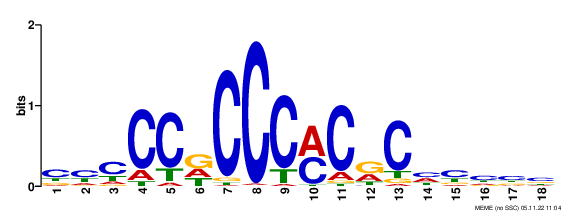

GATA1_HUMAN.H10MO.A


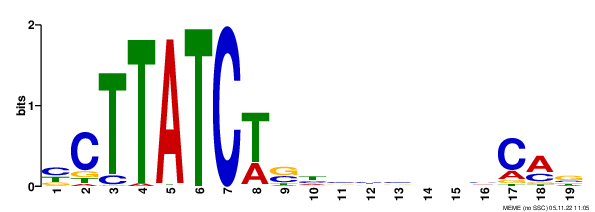

In [56]:
plotTF_motifs(markedTFs)

GATA1_HUMAN.H10MO.A


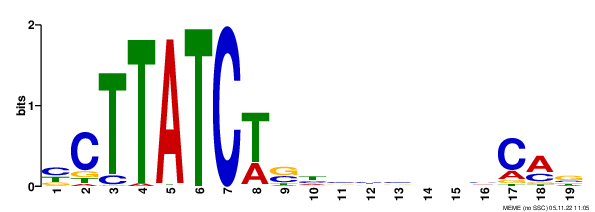

FOXC2_HUMAN.H10MO.D


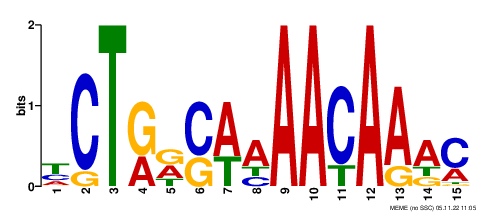

CPEB1_HUMAN.H10MO.D


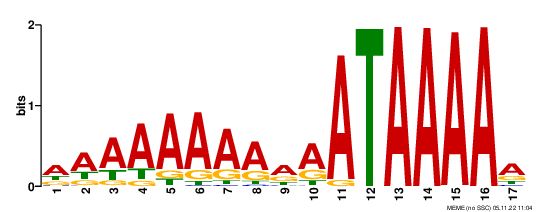

THA_HUMAN.H10MO.C


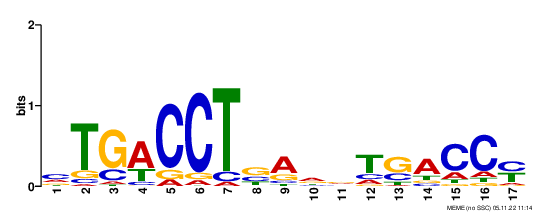

EGR1_HUMAN.H10MO.S


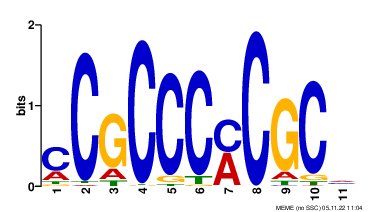

TFDP1_HUMAN.H10MO.D


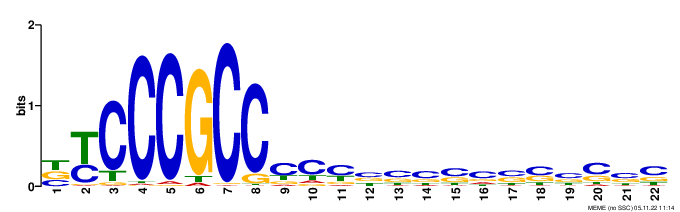

WT1_HUMAN.H10MO.D


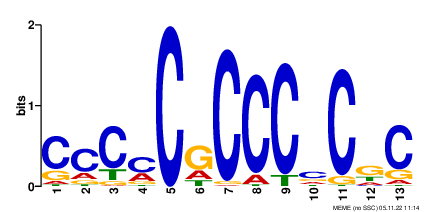

EGR1_HUMAN.H10MO.A


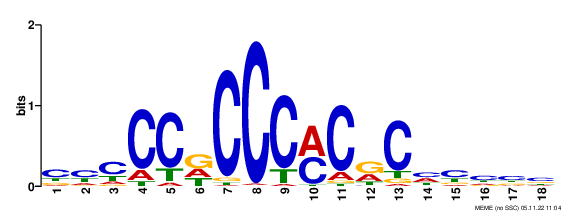

SP3_HUMAN.H10MO.B


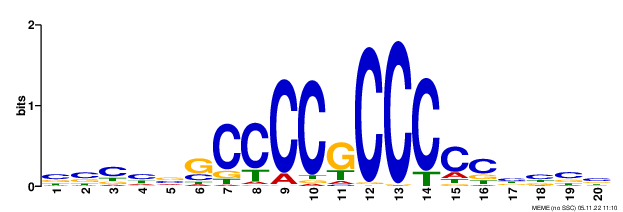

SP2_HUMAN.H10MO.C


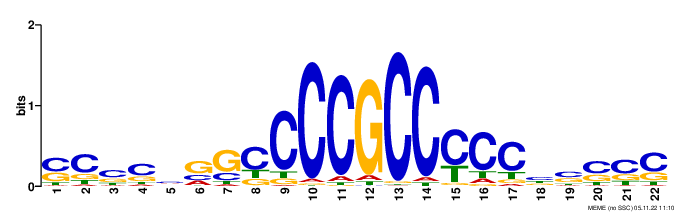

PURA_HUMAN.H10MO.D


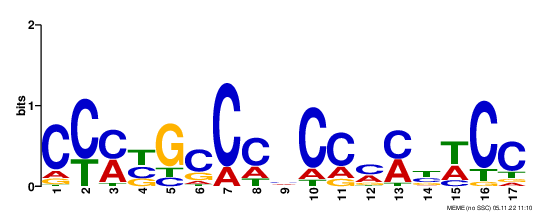

SP4_HUMAN.H10MO.D


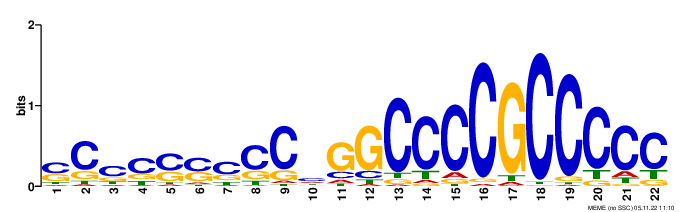

SP1_HUMAN.H10MO.C


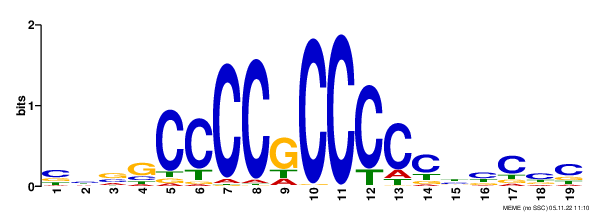

MAFK_HUMAN.H10MO.S


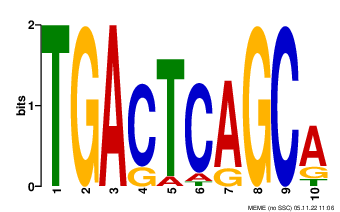

BACH1_HUMAN.H10MO.A


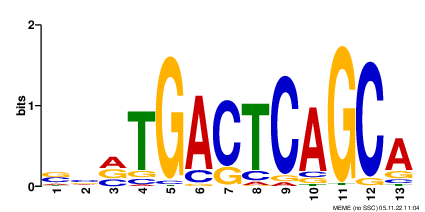

NF2L2_HUMAN.H10MO.D


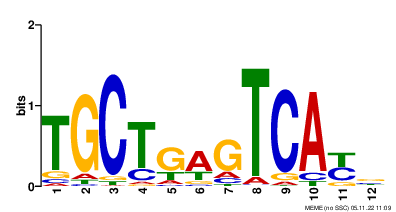

NFE2_HUMAN.H10MO.B


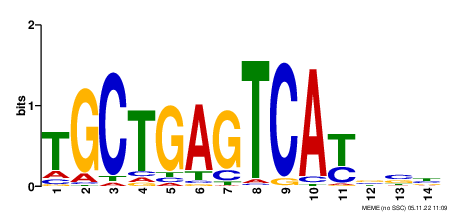

In [57]:
plotTF_motifs(allsigTFs)

In [63]:

def plotTF_TFEA_masterplot(TFs):
    for TF in TFs:
        for i, filename in enumerate(allfilesdir):
            imagename =indir+filename+"/plots/"+TF+"_enrichment_plot.png"
            print (imagename)
            display(Image(filename=imagename)) 
            #/scratch/Shares/dowell/temp/forMary/Ninas_TFEA_outputs/all/results_WTASvsKOAS/plots/GATA1_HUMAN.H10MO.A_enrichment_plot.png

    #

/scratch/Shares/dowell/temp/forMary/Ninas_TFEA_outputs/all/results_WTvsKO/plots/EGR1_HUMAN.H10MO.A_enrichment_plot.png


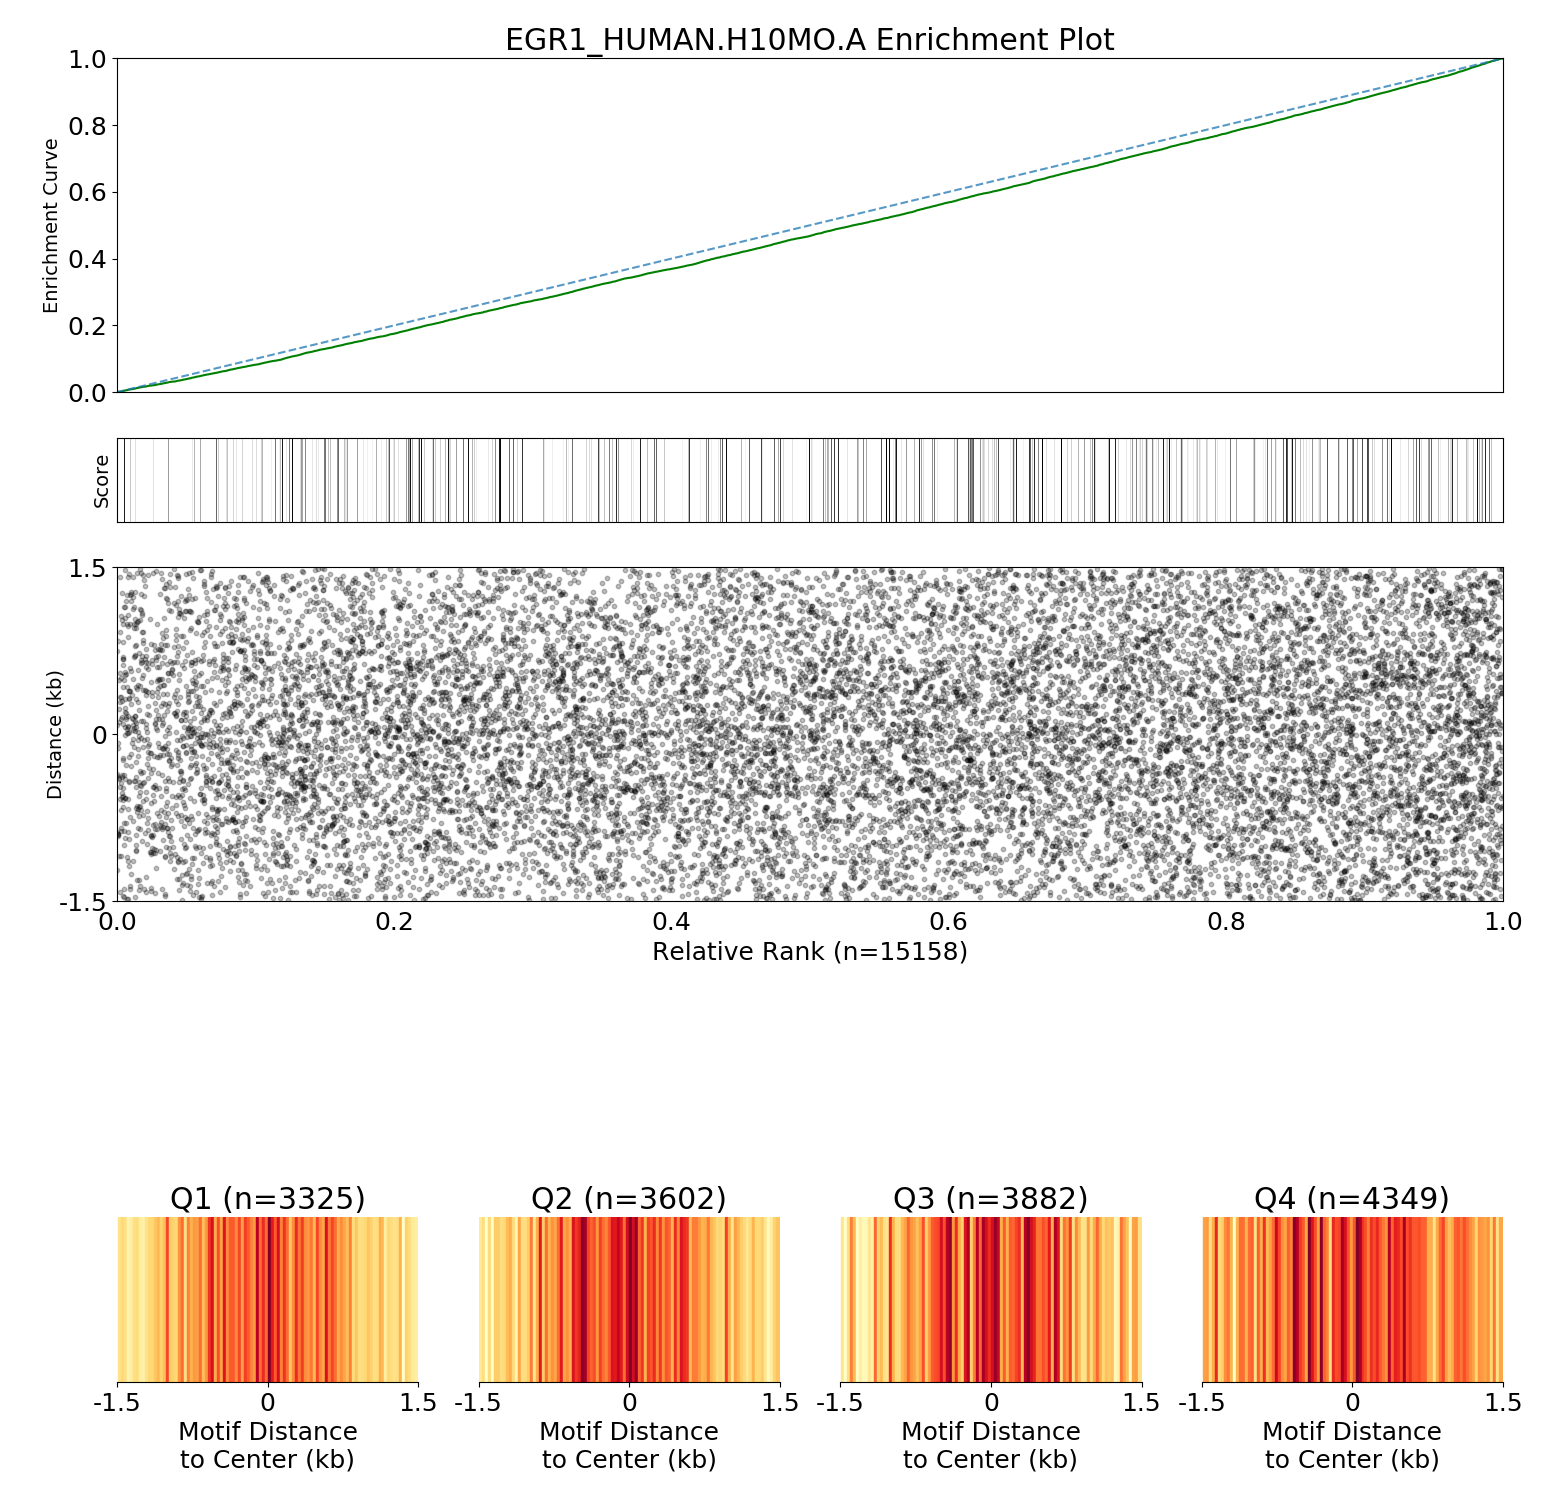

/scratch/Shares/dowell/temp/forMary/Ninas_TFEA_outputs/all/results_KOvsKOAS/plots/EGR1_HUMAN.H10MO.A_enrichment_plot.png


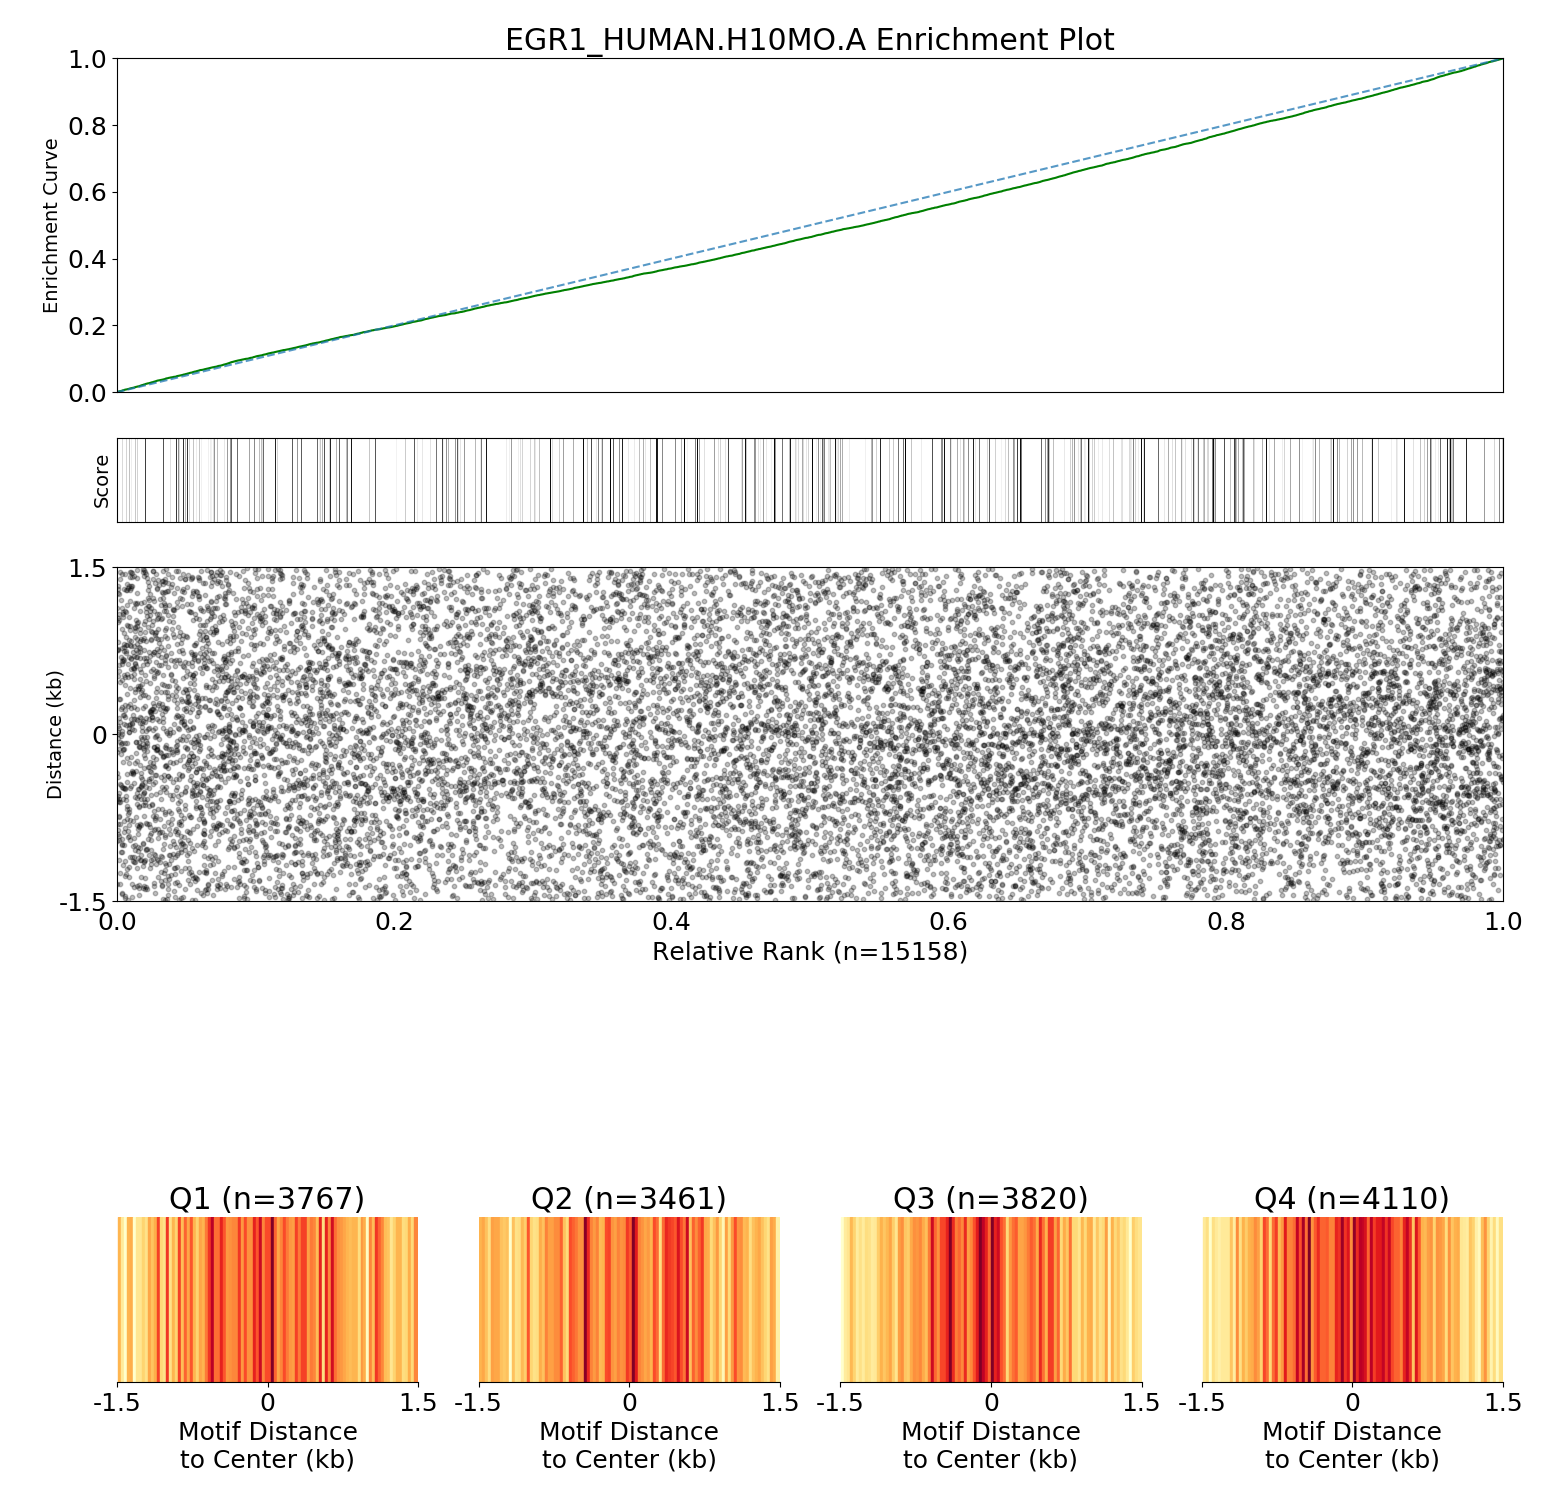

/scratch/Shares/dowell/temp/forMary/Ninas_TFEA_outputs/all/results_WTvsWTAS/plots/EGR1_HUMAN.H10MO.A_enrichment_plot.png


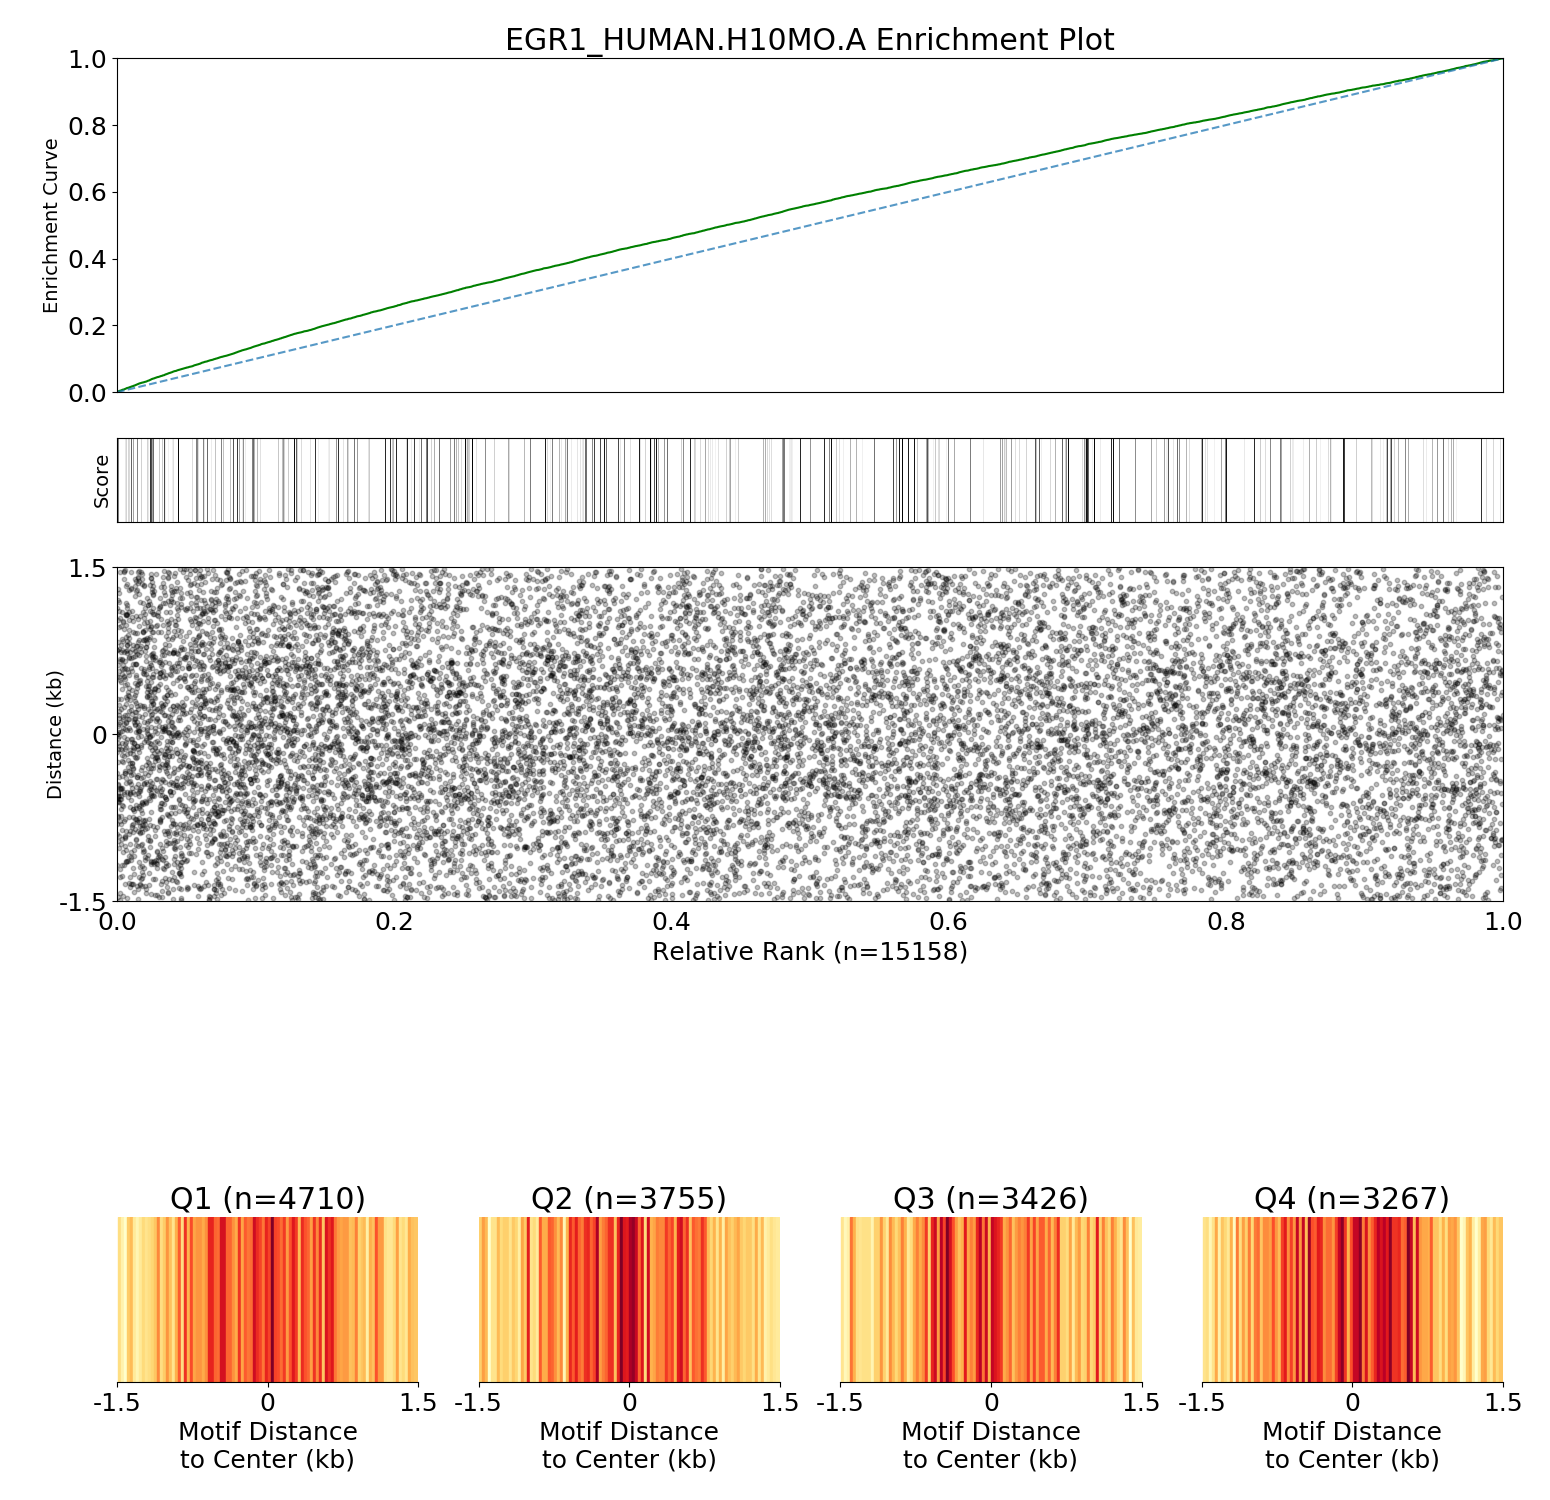

/scratch/Shares/dowell/temp/forMary/Ninas_TFEA_outputs/all/results_WTASvsKOAS/plots/EGR1_HUMAN.H10MO.A_enrichment_plot.png


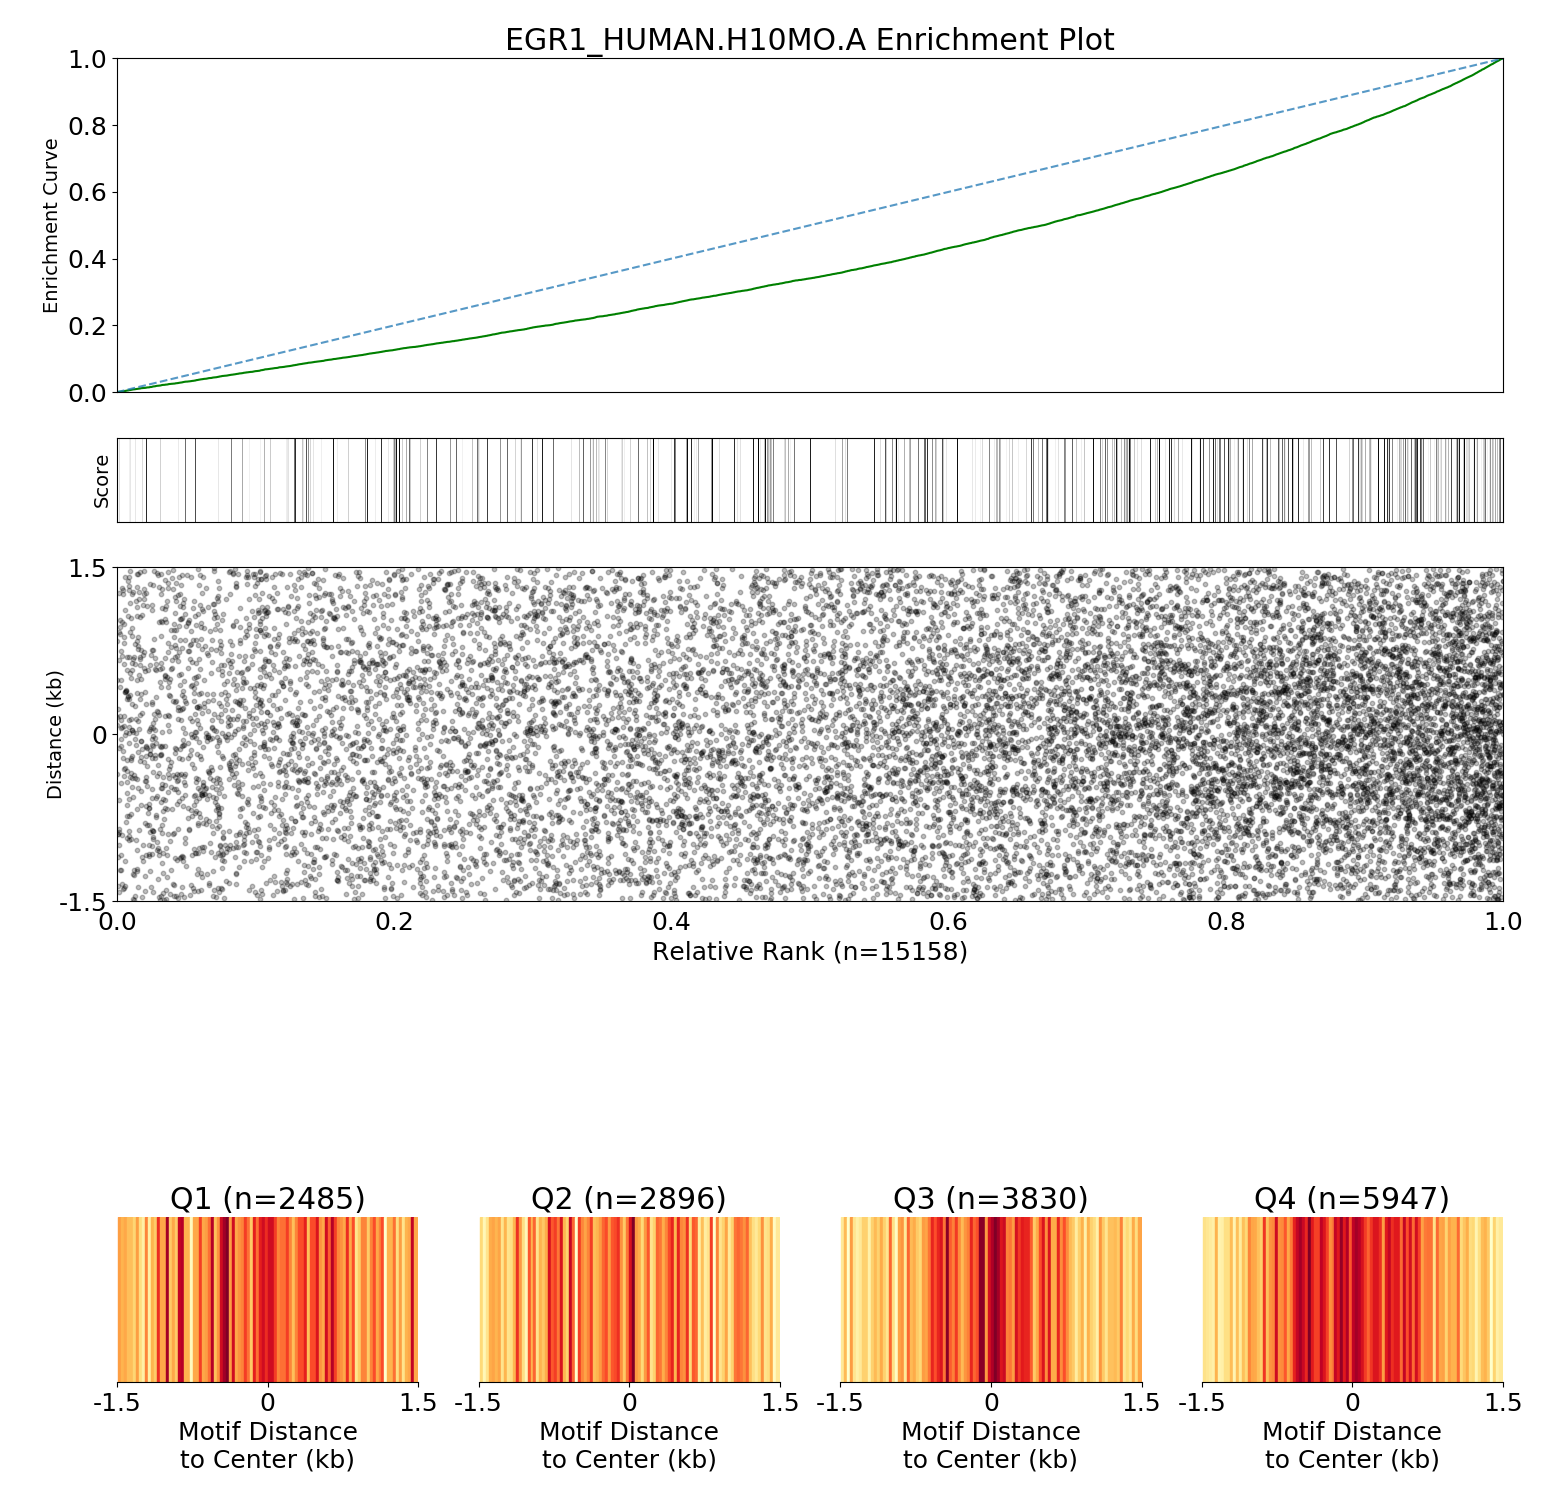

/scratch/Shares/dowell/temp/forMary/Ninas_TFEA_outputs/all/results_WTvsKO/plots/GATA1_HUMAN.H10MO.A_enrichment_plot.png


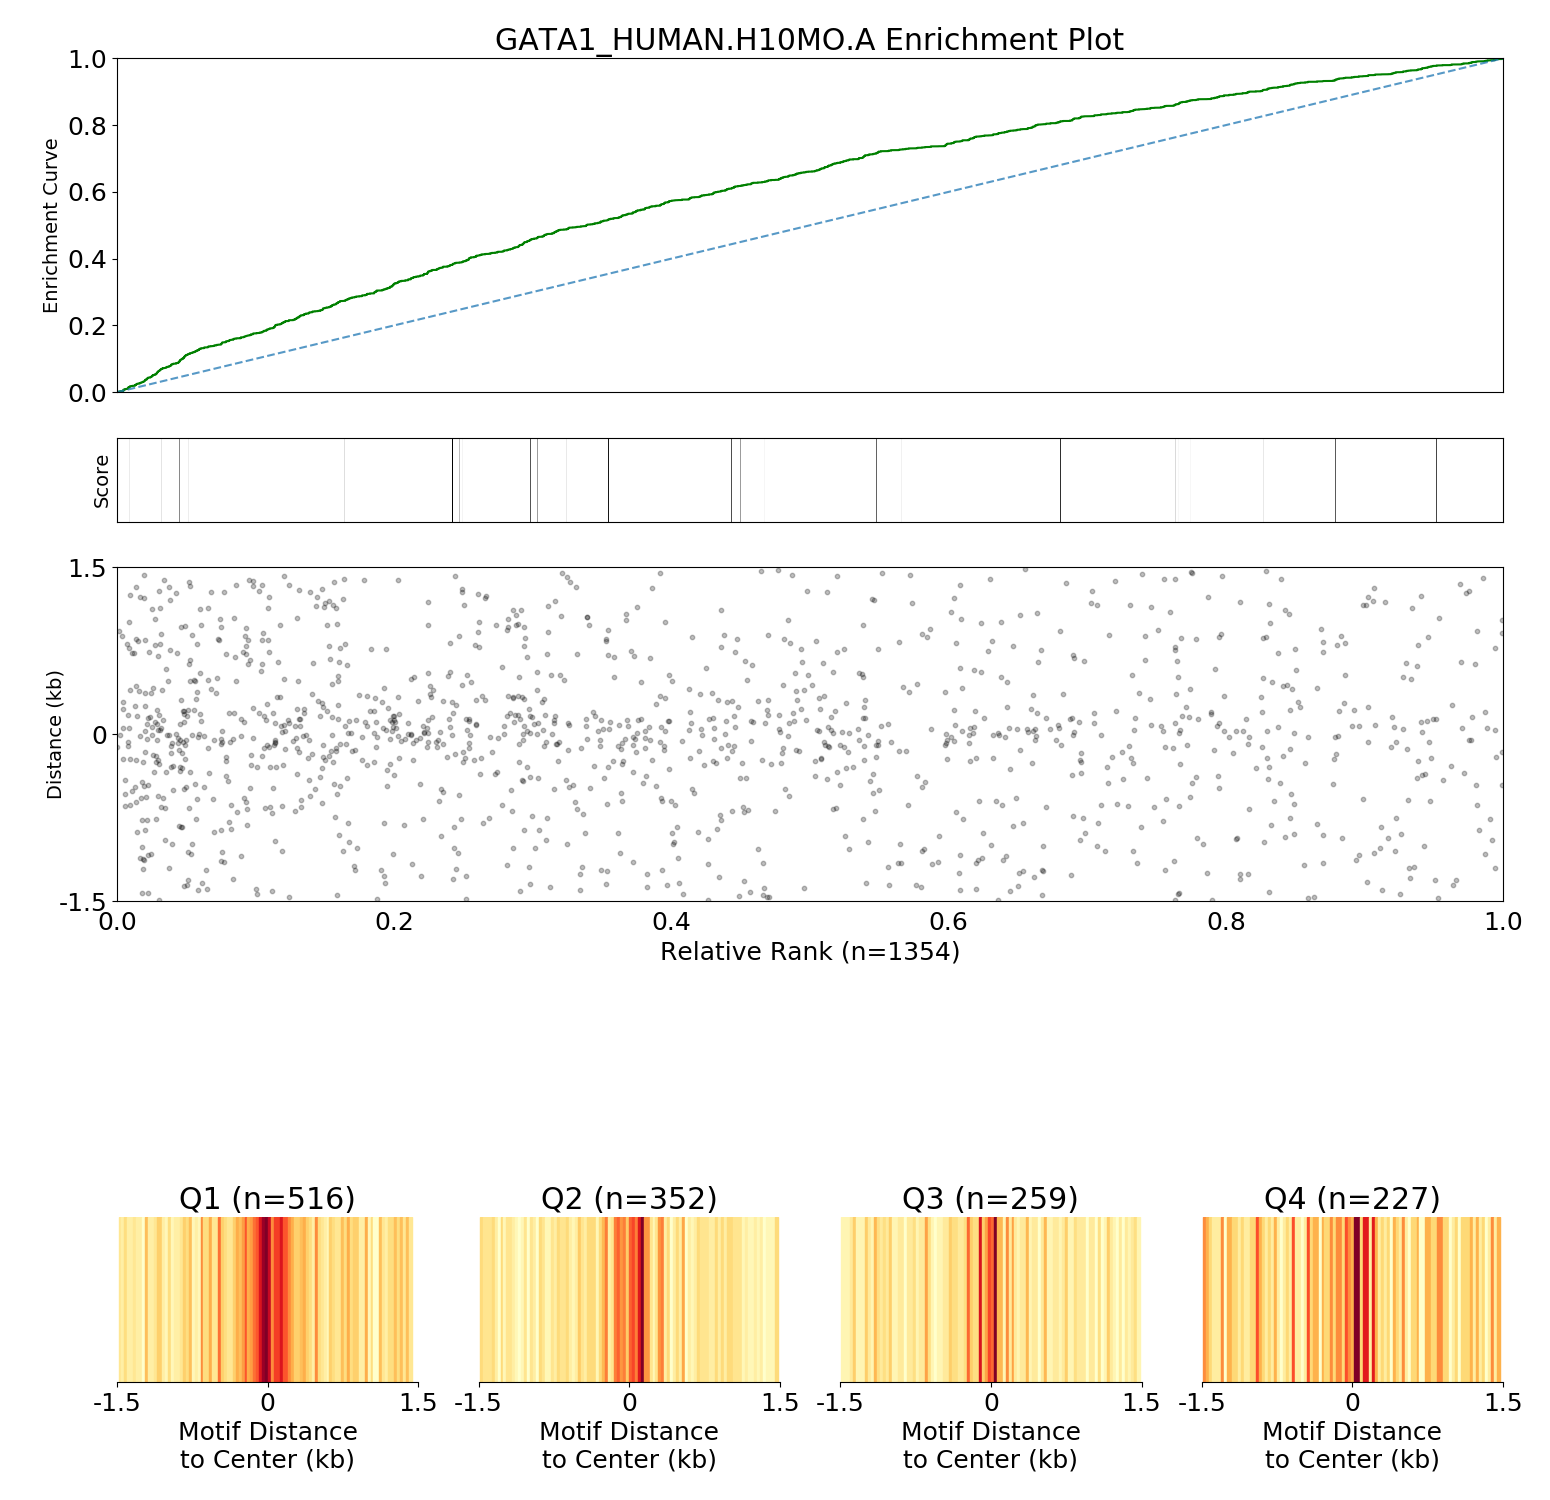

/scratch/Shares/dowell/temp/forMary/Ninas_TFEA_outputs/all/results_KOvsKOAS/plots/GATA1_HUMAN.H10MO.A_enrichment_plot.png


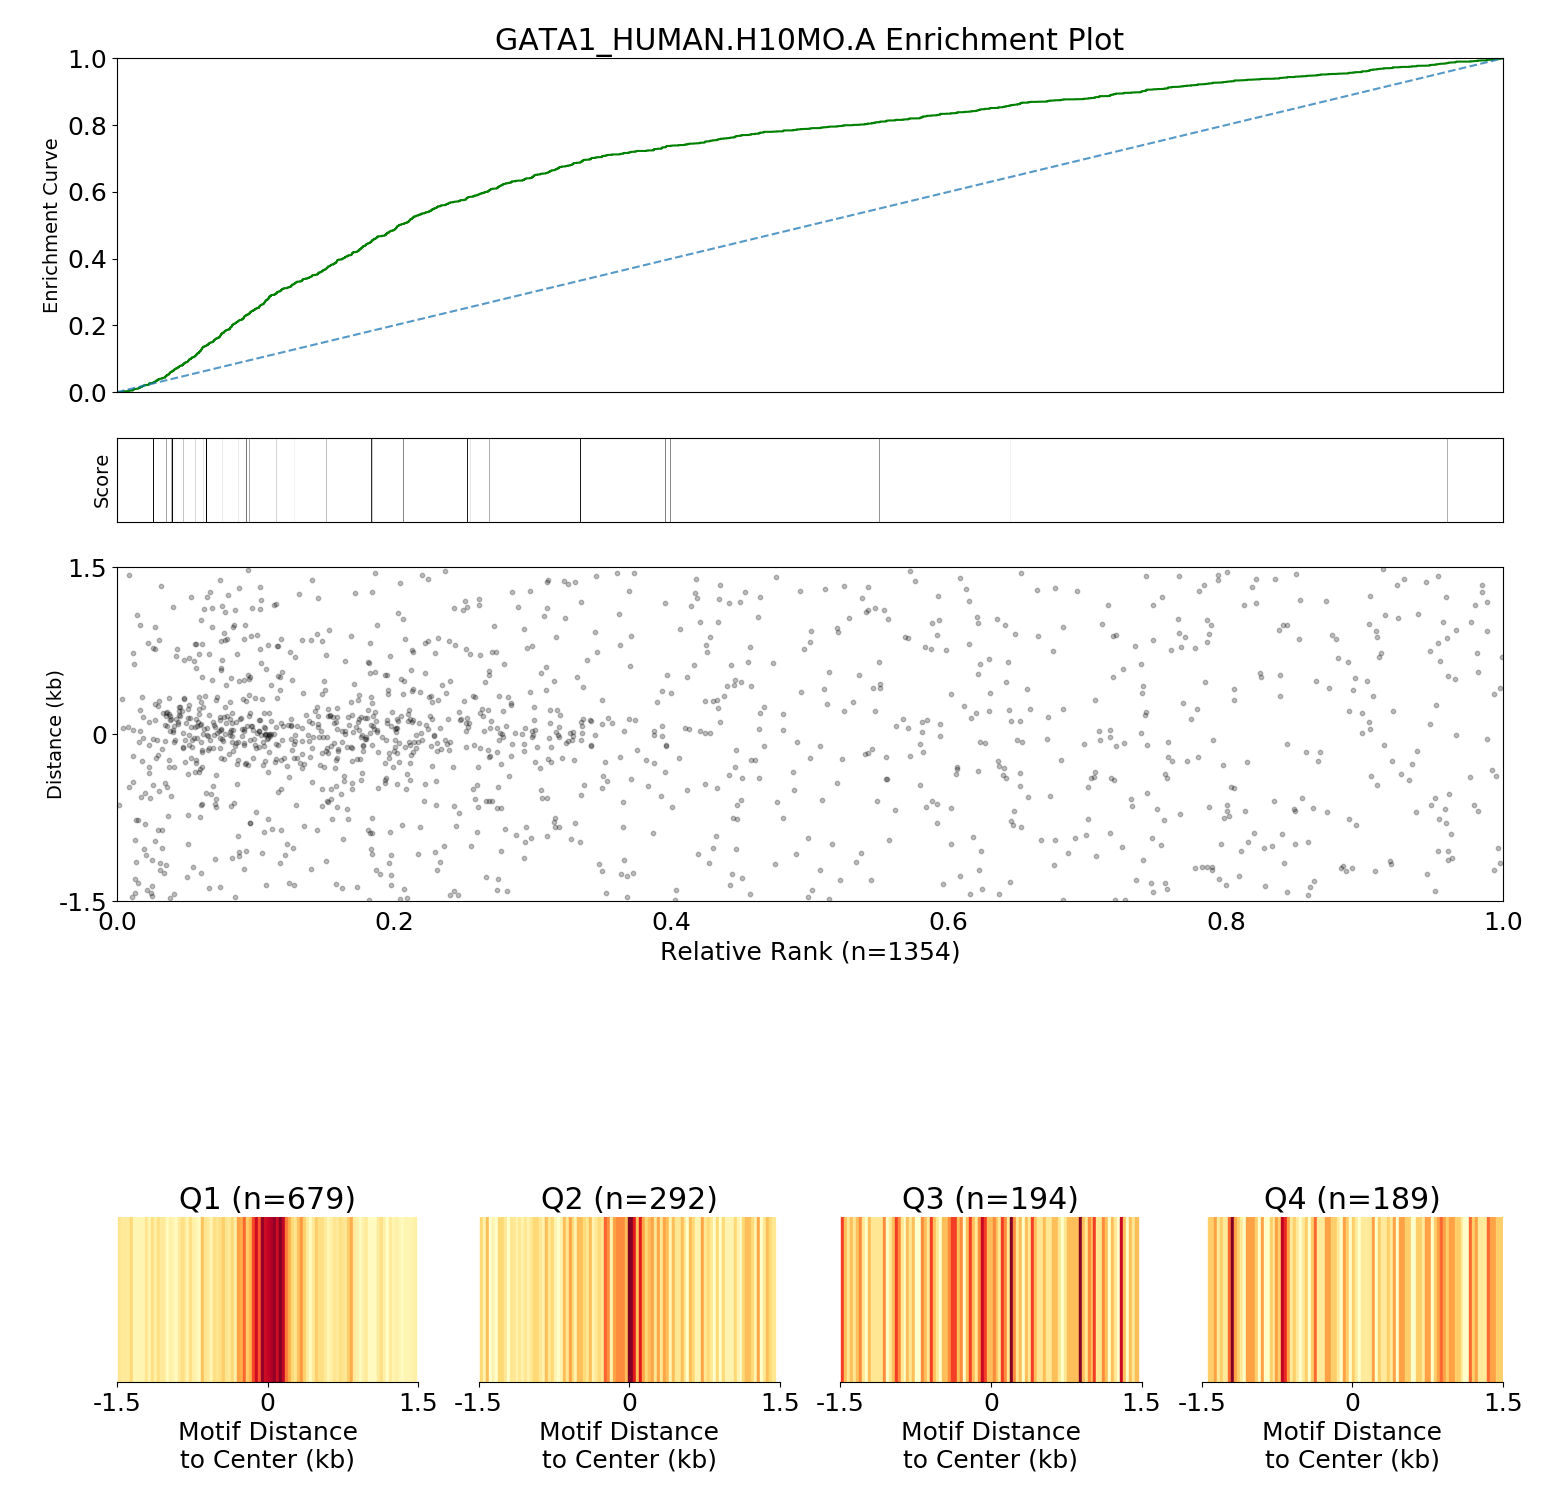

/scratch/Shares/dowell/temp/forMary/Ninas_TFEA_outputs/all/results_WTvsWTAS/plots/GATA1_HUMAN.H10MO.A_enrichment_plot.png


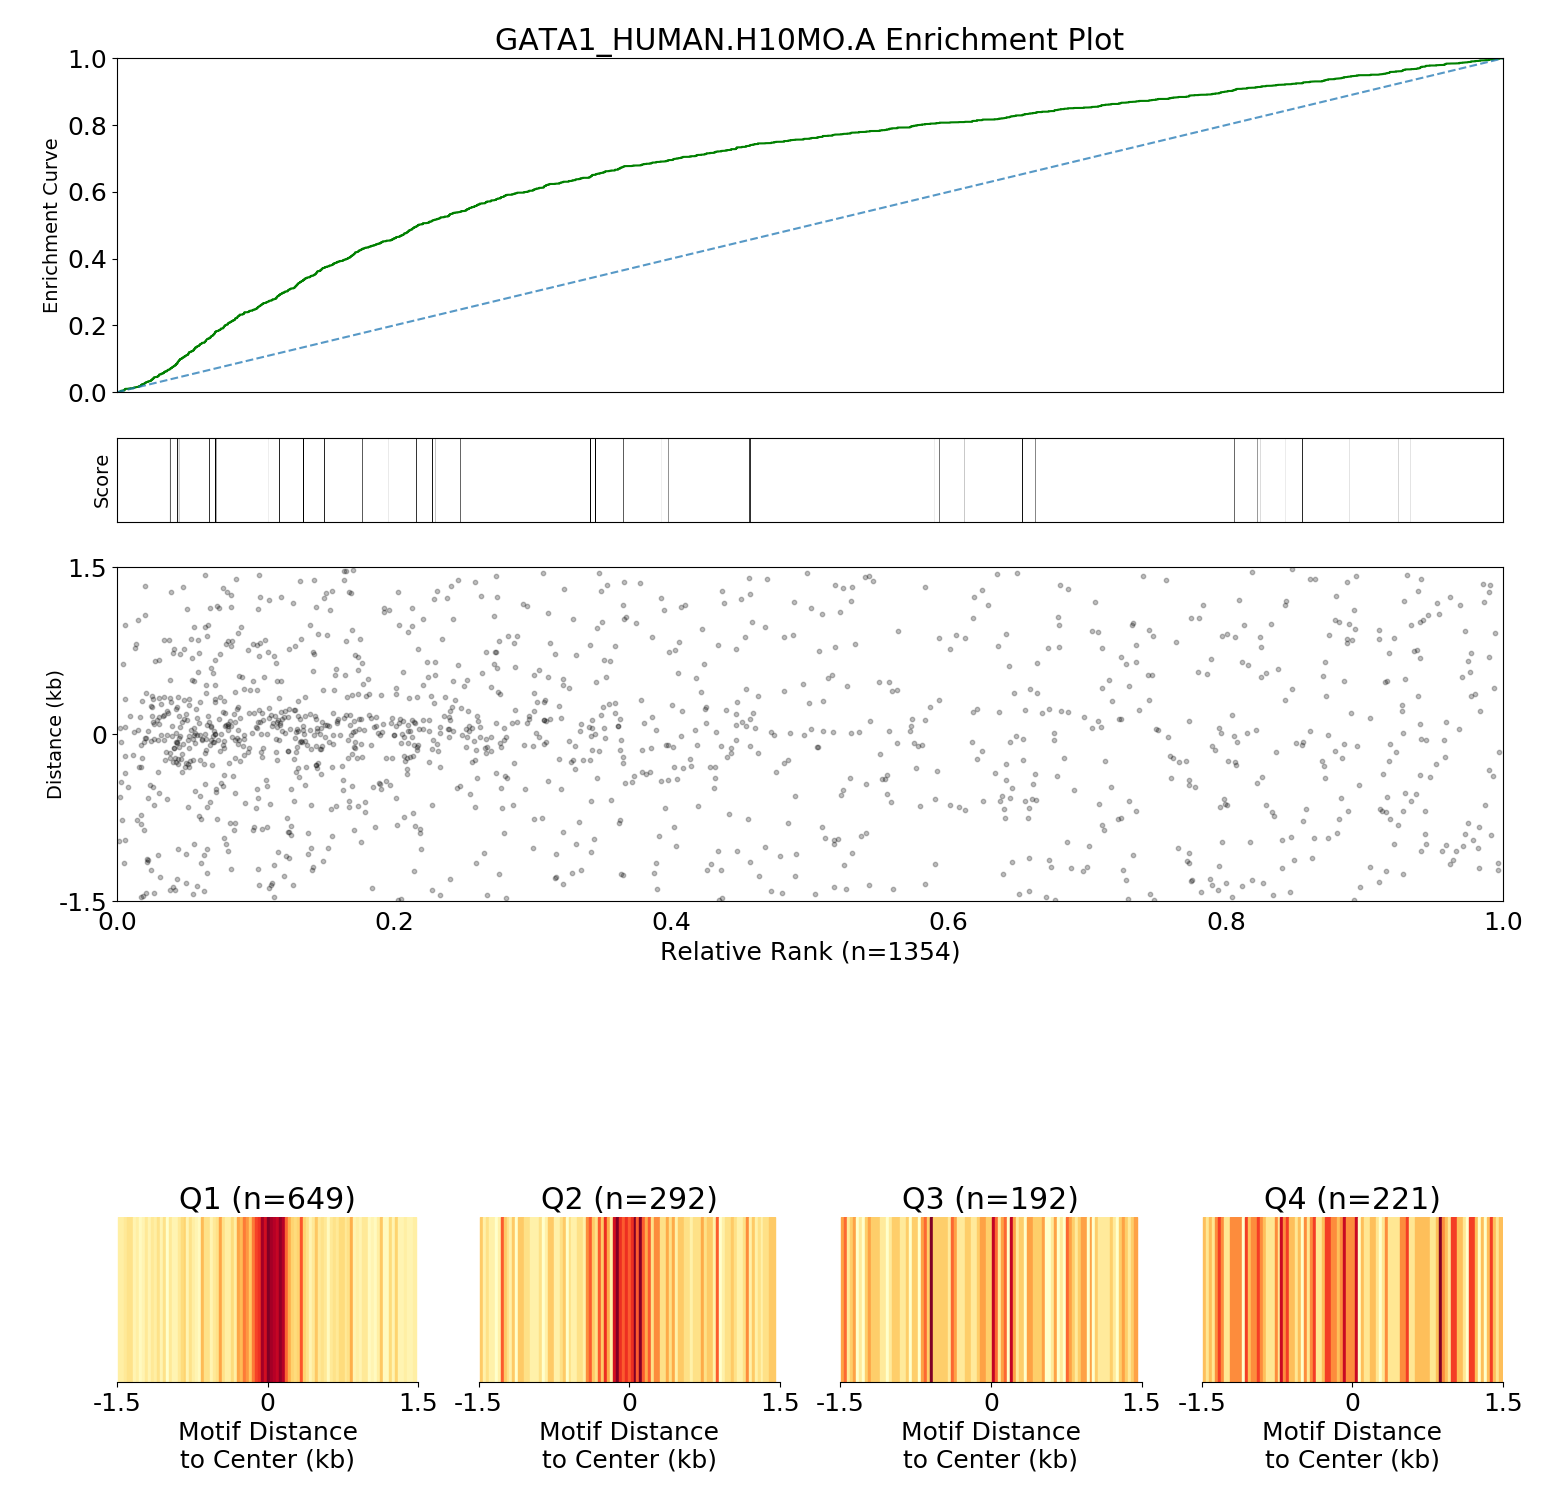

/scratch/Shares/dowell/temp/forMary/Ninas_TFEA_outputs/all/results_WTASvsKOAS/plots/GATA1_HUMAN.H10MO.A_enrichment_plot.png


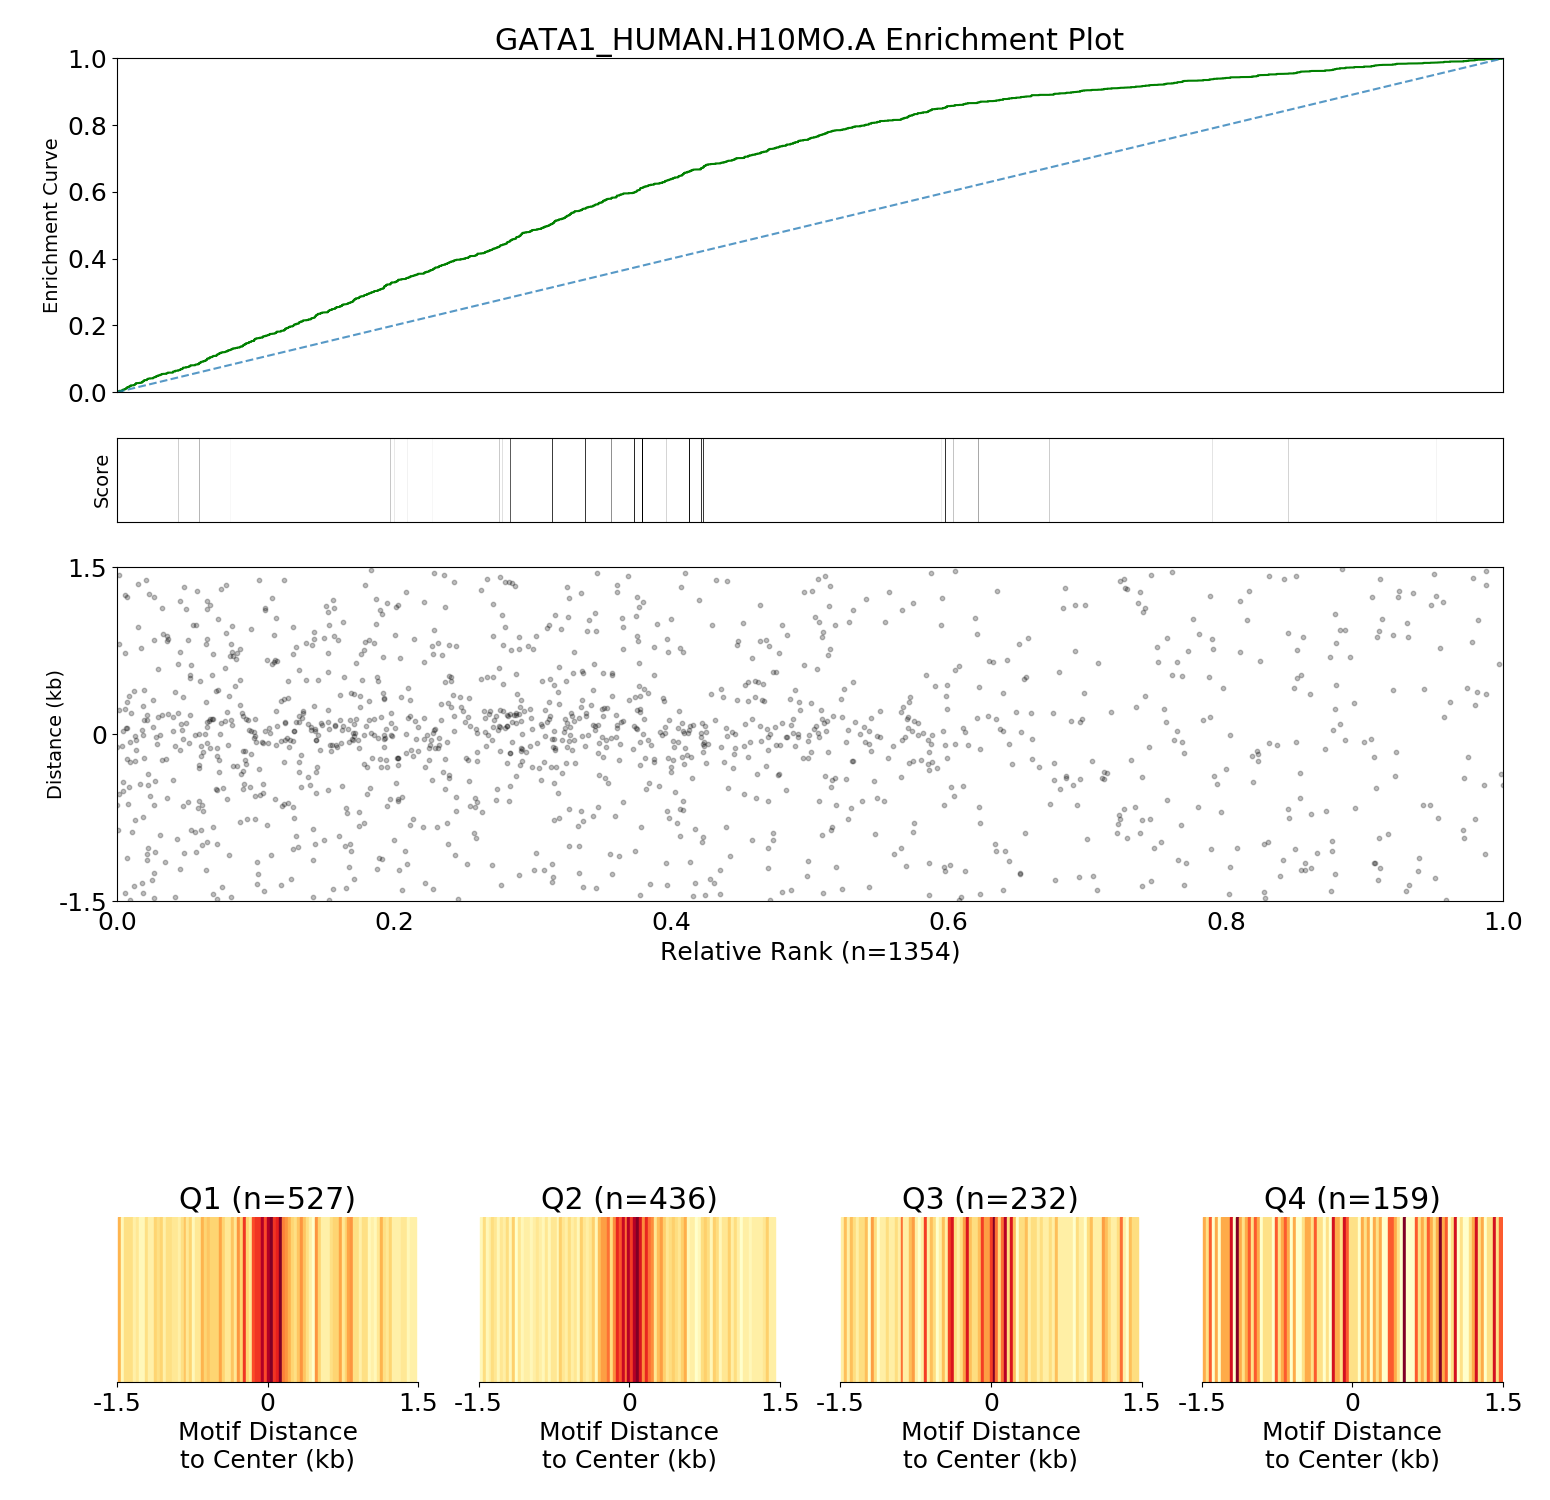

In [64]:
plotTF_TFEA_masterplot(markedTFs)

/scratch/Shares/dowell/temp/forMary/Ninas_TFEA_outputs/all/results_WTvsKO/plots/GATA1_HUMAN.H10MO.A_enrichment_plot.png


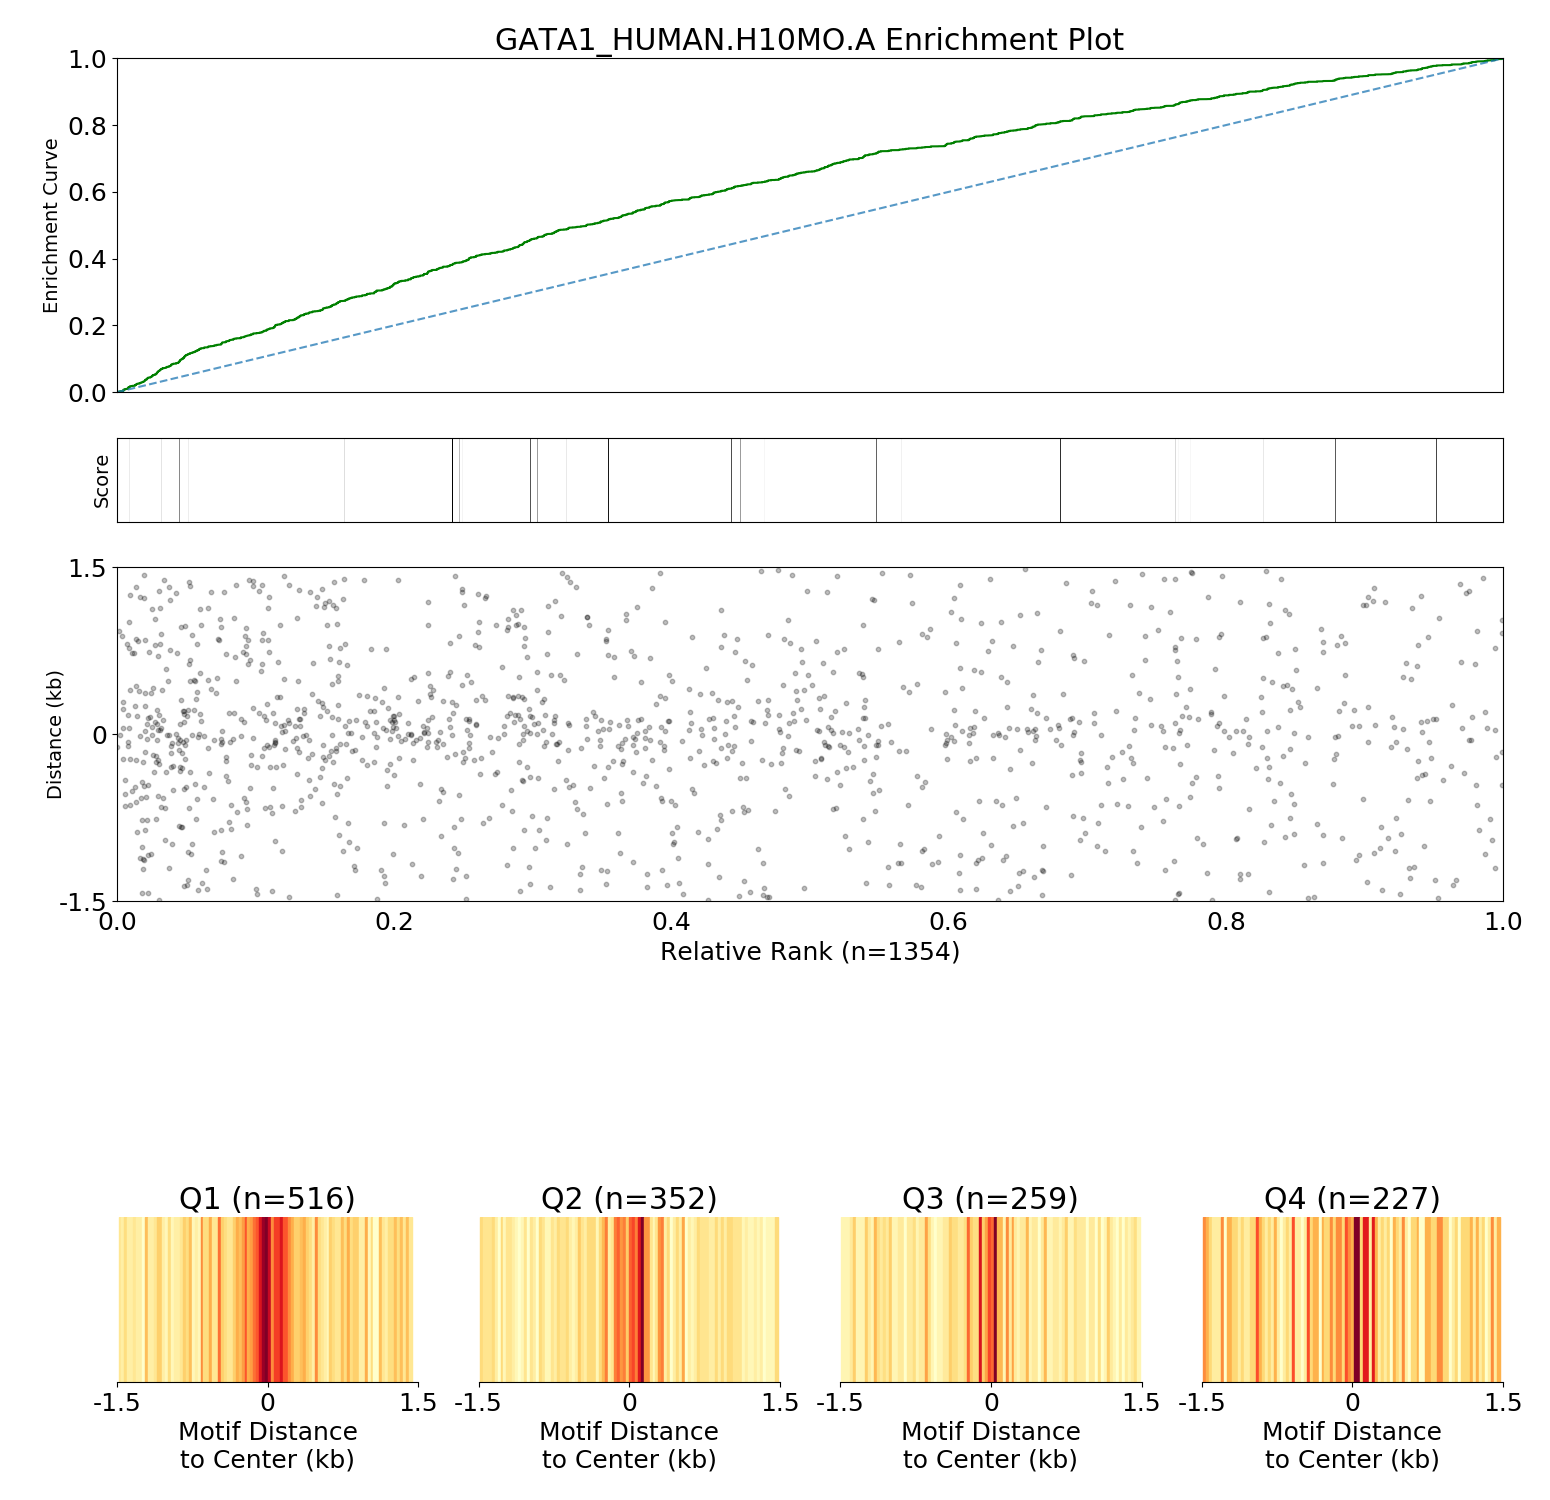

/scratch/Shares/dowell/temp/forMary/Ninas_TFEA_outputs/all/results_KOvsKOAS/plots/GATA1_HUMAN.H10MO.A_enrichment_plot.png


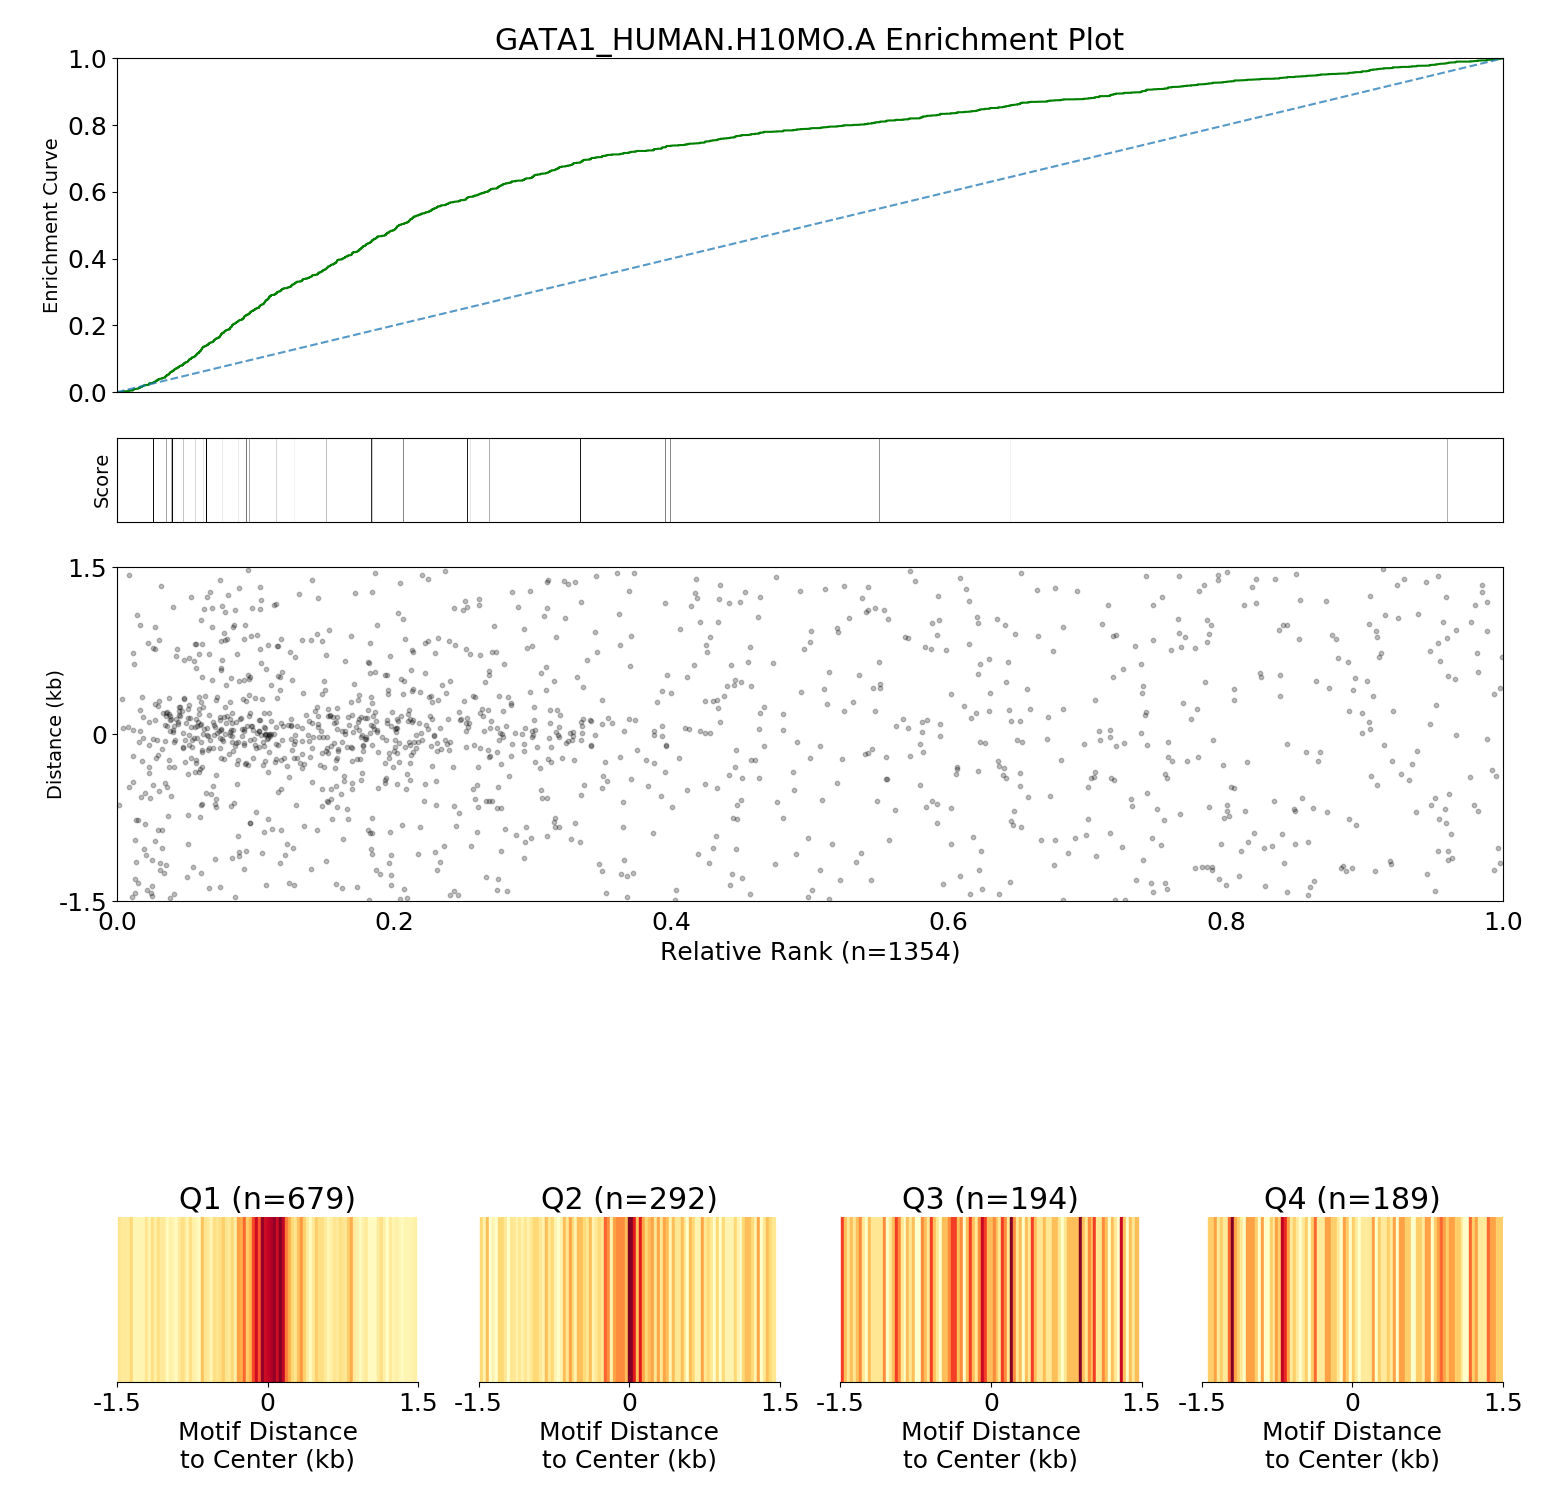

/scratch/Shares/dowell/temp/forMary/Ninas_TFEA_outputs/all/results_WTvsWTAS/plots/GATA1_HUMAN.H10MO.A_enrichment_plot.png


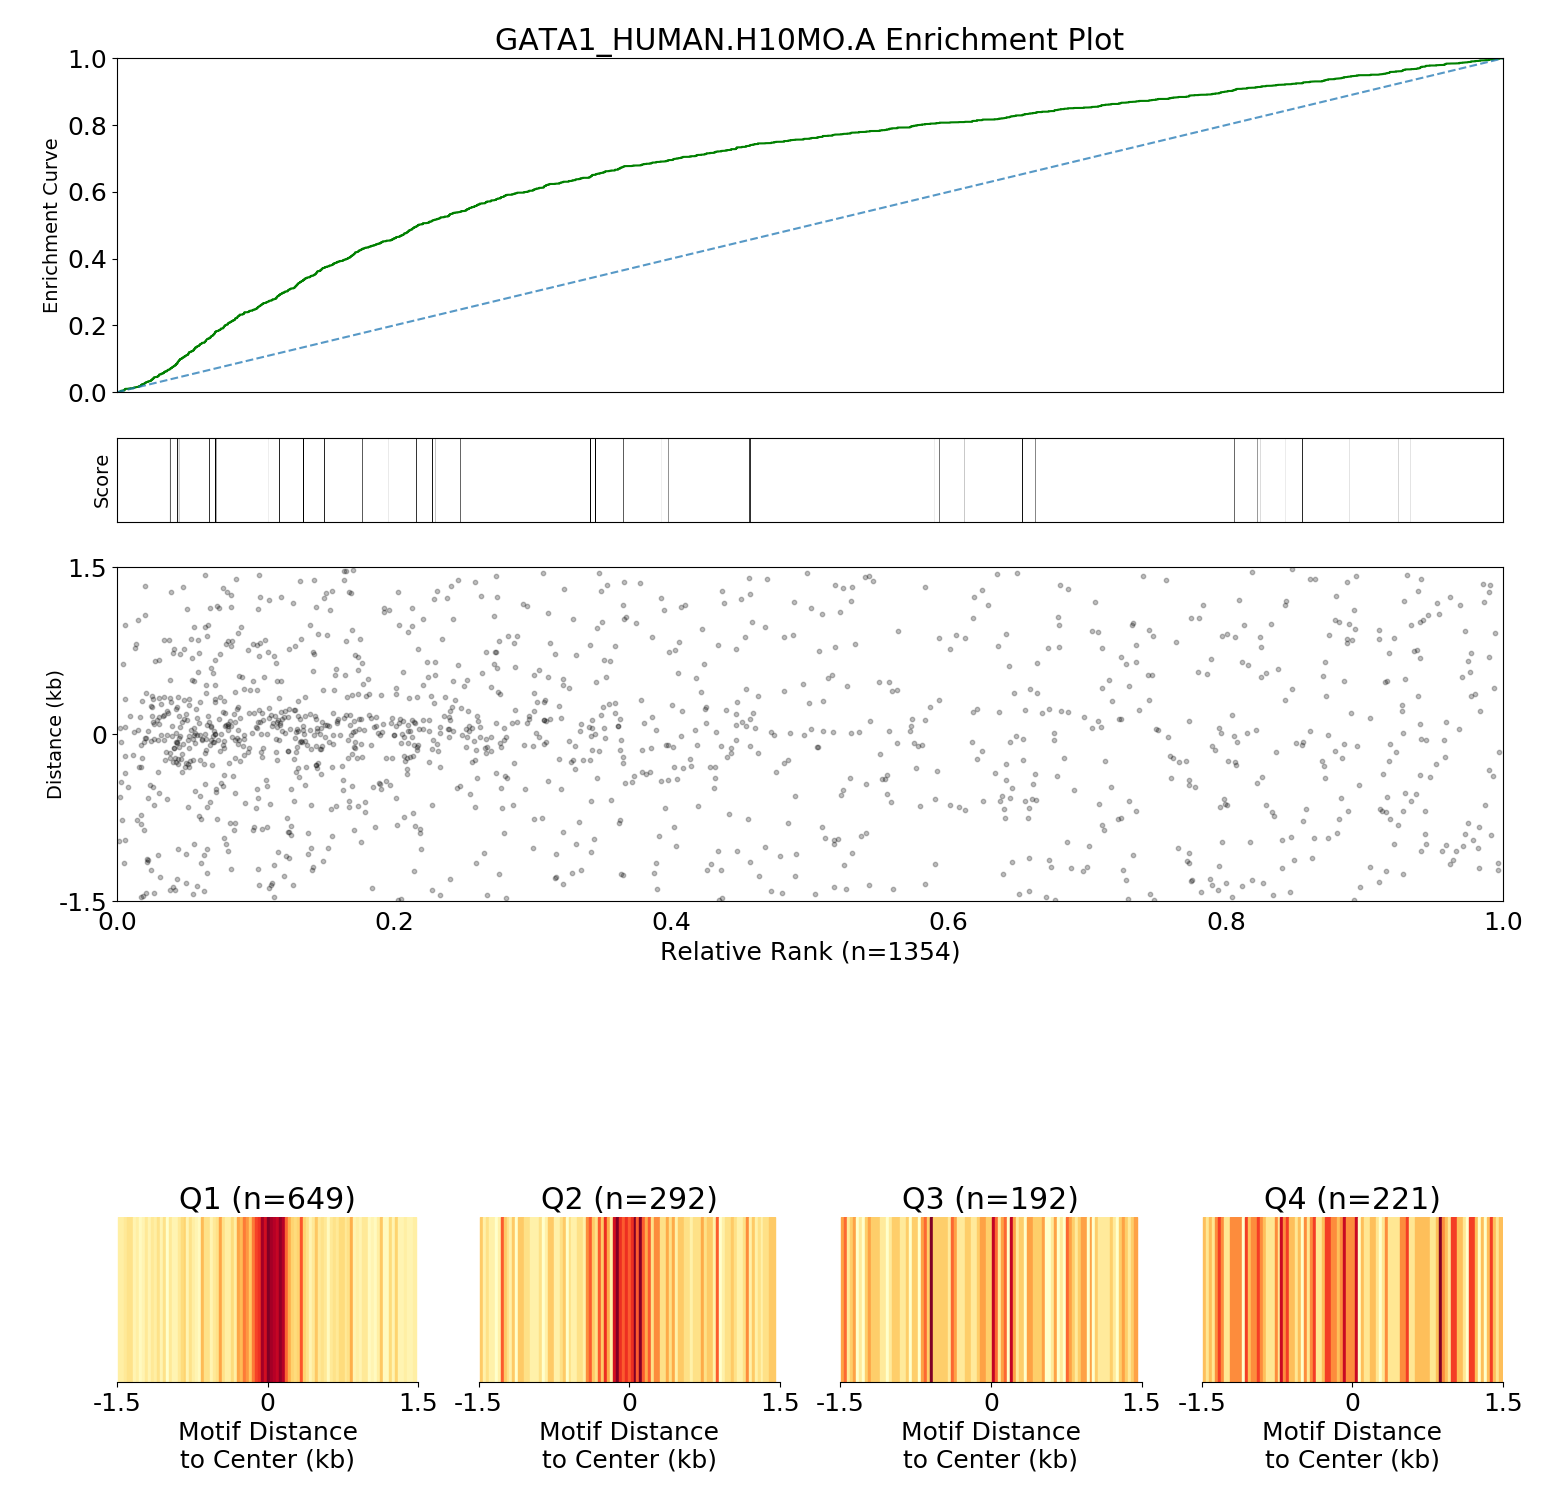

/scratch/Shares/dowell/temp/forMary/Ninas_TFEA_outputs/all/results_WTASvsKOAS/plots/GATA1_HUMAN.H10MO.A_enrichment_plot.png


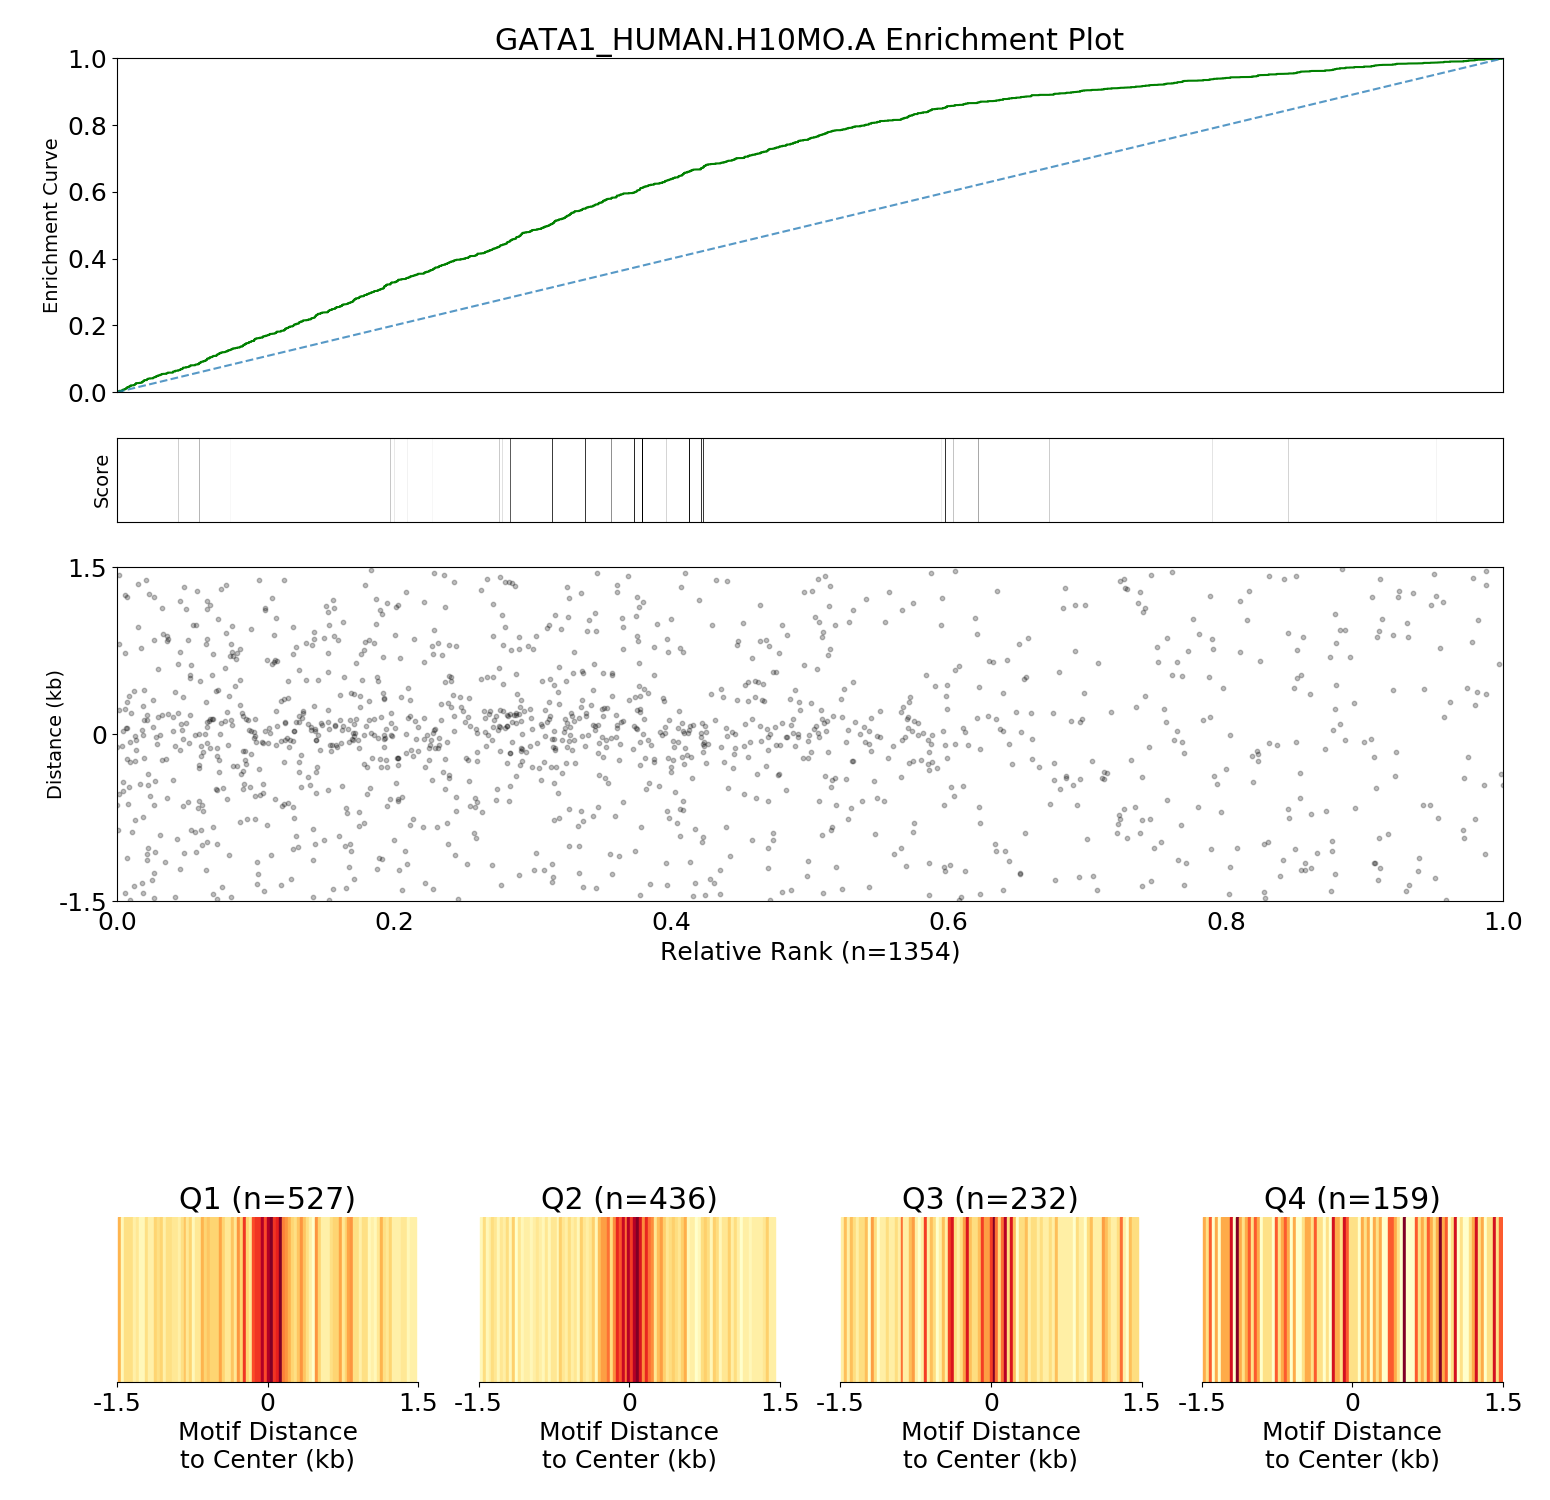

In [66]:
plotTF_TFEA_masterplot(myfaveTF)